# 📈 Vizualizace ve strojovém učení od A do Z

## 📚 Data
V této úloze budeme předpovídát popularity hudby. Data, která budou použita, byla získána ze služby Spotify a jsou k dispozici zde na Kaggle[1].

Data mají následující atributy:

* **id**: Identifikátor skladby v databázi spotify
* **artists**: Jména interpretů
* **name**: Název skladby
* **year**: Rok vydání
* **release_date**: Datum vydání písně, kódované v podobě rok-měsíc-den. Ne všechny písně však mají úplné informace, takže je možné, že obsahují například jen rok.
* **acousticness**: Mezi 0 a 1, jak moc je píseň akustická.
* **danceability**: Mezi 0 a 1, jak moc je píseň taneční.
* **duration_ms**: Doba trvání v milisekundách.
* **energy**: Mezi 0 a 1, jak energická je hudba.
* **explicit**: 1, pokud píseň obsahuje text s explicitním obsahem, jinak 0.
* **instrumentalness**: Mezi 0 a 1, jak moc je píseň instrumentální.
* **key**: Tón písně, mapuje se zde.
* **liveness**: Mezi 0 a 1, jak moc je píseň "živá".
* **loudness**: Jak hlasitá je hudba. Hodnota se obvykle pohybuje mezi -60 a 0, což představuje množství decibelů v hudbě.
* **mode**: 1, pokud je hudba v durové tónině, 0, pokud je v mollové tónině. Lidově řečeno, hudba s vyššími tóny je považována za veselou hudbu, zatímco hudba s nižšími tóny je považována za smutnější.
* **speechiness**: Mezi 0 a 1, jak moc je hudba vokalizovaná/mluvená.
* **tempo**: Tempo skladby v úderech za minutu (BPM).
* **valence**: Mezi 0 a 1, popisuje pozitivitu skladby, přičemž vysoké hodnoty jsou pro pozitivní skladby (veselé, radostné, euforické atd.) a nízké hodnoty pro negativní skladby (smutné, naštvané atd.).
* **popularity**: V rozmezí 0 až 100 vyjadřuje popularitu skladby. V této sadě se jedná o cílovou proměnnou.

## Obsah projektu

Úkol je vypracován **ve skupině 3 lide**.

**📖 Naše úloha:**
1. Popišme klasifikační/regresní úlohu, kterou v rámci domácího úkolu budeme řešit.
2. Uveďme zdroj, odkud čerpáte data.

**✨ Dataset:**
V této části máme za úkol načíst zvolená data a pomocí vizualizace a popisných statistik se s nimi seznámit. Dále je nutné data vhodným způsobem předzpracovat.
1. Načtěme si zvolený dataset a importujme potřebné knihovny.
2. Představme jednotlivé příznaky pomocí textových popisů.
3. Analyzujme dataset pomocí popisných statistik s využitím vhodných vizualizačních metod.
4. Vyšetřeme chybějící hodnoty (včetně jejich reprezentace) a odlehlá pozorování.
5. Proveďme všechny další úpravy, které jsou pro práci s vybraným datasetem nezbytné (konverze datových typů, odstranění duplicitních údajů, vytvoření nových příznaků, sjednocení reprezentace chybějících dat nebo jejich odstranění apod.).
6. Připravme dataset tak, abysme na něm mohli natrénovat a vyhodnotit vybraný model.

**⚙️Model:**
1. Pro svoji úlohu zvolme vhodný klasifikační/regresní model.
2. Zvolme si alespoň dva hyperparametry spolu s minimálně pěti hodnotami, jejichž nejlepší kombinaci budeme během trénování modelu hledat. Zvolené hyperparametry a jejich hodnoty popišme.
3. Zvolme a popišeme ztrátovou funkci, pomocí které provedeme vyhodnocení úspěšnosti modelu.
4. Daný model na datasetu natrénujme.
5. Vhodně vizualizujme a komentujme vliv jednotlivých kombinací hyperparamentrů na úspěšnost modelu. Uveďme nejlepší kombinaci.
6. Vhodně vizualizujme úspěšnost výsledného modelu.

### Imports

In [2]:
import cairosvg

import numpy as np
import re
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

from sklearn.datasets import make_blobs

import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import Ridge 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor 
import dtreeviz

import plotly.express as px
import pickle

import numpy as np

from scipy import optimize

import warnings

# Random state
rd_seed = 45

# Ignore some warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="matplotlib")

# Set style for the seaborn
sns.set(style="whitegrid")

### Task Description

In this task we will build predictive regression models for predicting the popularity of songs. The data to be used has been extracted from Spotify.

### Data exploration

#### Datset column description

* **id**: Identifier of the song in the Spotify database
* **artists**: Names of artists
* **name**: Song name
* **year**: Release year
* **release_date**: The release date of the song, encoded in Year-Month-Day format. However, not all songs have complete information, so only the year may be available, for example.
* **acousticness**: Between 0 and 1, indicating how acoustic the music is.
* **danceability**: Between 0 and 1, indicating how danceable the music is.
* **duration_ms**: Duration in milliseconds.
* **energy**: Between 0 and 1, indicating the music's energy level.
* **explicit**: 1 if the song contains explicit content in the lyrics, 0 otherwise.
* **instrumentalness**: Between 0 and 1, indicating how instrumental the music is.
* **key**: Song tone.
* **liveness**: Between 0 and 1, indicating how "live" the music feels.
* **loudness**: How loud the music is. The value usually ranges between -60 and 0, representing the amount of decibels in the music.
* **mode**: 1 if the music is in a major key, 0 if in a minor key. Popularly, songs in major keys are considered happy, while those in minor keys are considered sadder.
* **speechiness**: Between 0 and 1, indicating how much the music is vocalized/spoken.
* **tempo**: Tempo of the music in Beats Per Minute (BPM).
* **valence**: Between 0 and 1, describing the positivity of the music, with high values for positive songs (happy, joyful, euphoric, etc.) and low values for negative songs (sad, angry, etc.).
* ***popularity***: Between 0 and 100, the popularity of the song. In this dataset, this is the target variable.

The dataset which is used in that homework was taken from : Kaggle, spotify-popularity-prediction-v2 [1]

In [92]:
# Read the data from the csv
data = pd.read_csv('music.csv')

In [93]:
# Check if the data was read successfully
display(data.head(3))

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38


In [94]:
# Split on features - Xdata and the target - ydata
ydata = data['popularity']
Xdata = data.drop('popularity', axis=1)

In [95]:
# To prevent further "methodological" mistakes, make the split on train, valid and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state = rd_seed, shuffle=True)
Xvalid, Xtest, yvalid, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state = rd_seed, shuffle=True)
print(f"""Shapes of datasets:
train: X:{Xtrain.shape}, y:{ytrain.shape}
valid: X:{Xvalid.shape}, y:{yvalid.shape}
test: X:{Xtest.shape}, y:{ytest.shape}""")

Shapes of datasets:
train: X:(77503, 18), y:(77503,)
valid: X:(25834, 18), y:(25834,)
test: X:(25835, 18), y:(25835,)


In [96]:
# Basic info about data in the dataset
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77503 entries, 7454 to 121803
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                77503 non-null  object 
 1   artists           77503 non-null  object 
 2   name              77503 non-null  object 
 3   year              77503 non-null  int64  
 4   acousticness      77503 non-null  float64
 5   danceability      77503 non-null  float64
 6   duration_ms       77503 non-null  int64  
 7   energy            77503 non-null  float64
 8   explicit          77503 non-null  int64  
 9   instrumentalness  77503 non-null  float64
 10  key               77503 non-null  int64  
 11  liveness          77503 non-null  float64
 12  loudness          77503 non-null  float64
 13  mode              77503 non-null  int64  
 14  release_date      77503 non-null  object 
 15  speechiness       77503 non-null  float64
 16  tempo             77503 non-null  float64

In [97]:
# Number of unqiue values by columns
Xtrain.nunique()

id                  77503
artists             21983
name                67106
year                  102
acousticness         4435
danceability         1095
duration_ms         35208
energy               2086
explicit                2
instrumentalness     5349
key                    12
liveness             1711
loudness            21624
mode                    2
release_date         8745
speechiness          1563
tempo               52806
valence              1636
dtype: int64

* As our team isn't sure at this point, which models will be used and how features should be changed, at this step,
basic explorational analysis will be conducted.

* As a result of this analysis, a visualization of all features and a function, which will make basic feature transformations are expected.

From the first glance we can see a few redundant columns, such as **id**, **name**, **artists**. First of all, 'id' is always just a redundant column, other two are features represented by strings, which have a lot of unique values in them, which is why they will be dropped.

In [98]:
Xtrain = Xtrain.drop(['id','name','artists'], axis=1, errors='ignore')

From the info abot the dataset, we know that each song is unique. But we all know that sometimes songs are being copied illegally let's check if there are here such examples. If so, let's delete them.

In [99]:
df = pd.concat([Xtrain, ytrain], axis=1)
len_bef = len(df)
df_nodup = df.drop_duplicates(subset=(set(df.columns)-set(['popularity'])))
len_aft = len(df_nodup)
Xtrain, ytrain = df_nodup.drop('popularity', axis=1), df_nodup['popularity']
print(f"{len_bef-len_aft} duplicates were deleted :)")

572 duplicates were deleted :)


The next one feature which should be inspected is **release_date**. Because it is said that this column can have incomplete information. Let's take a look at what does it mean.

In [100]:
display(Xtrain['release_date'].head(20))
# As we see that this feature can (potentially) contain datetime or year or ... inside it, let's leave only 'year'
Xtrain = Xtrain.drop(['release_date'], axis=1, errors='ignore')

7454      1987-01-01
75372     1968-01-21
99807     1998-05-19
31360     2018-03-03
50987     2005-07-13
34163     1965-01-01
90587     1974-08-08
54488     2008-06-10
119527    1957-01-01
33955     1980-10-17
6714      1954-01-18
96610     1989-01-01
112681          1957
7286      1978-01-01
5415      1984-10-15
113217    1999-03-01
75694     2014-07-04
77237           1952
8439      1979-10-12
64209     1961-01-01
Name: release_date, dtype: object

Now, when deleted features with obvious problems, let's take a look at the dataset.

In [101]:
Xtrain.info()
display(Xtrain.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 76931 entries, 7454 to 121803
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              76931 non-null  int64  
 1   acousticness      76931 non-null  float64
 2   danceability      76931 non-null  float64
 3   duration_ms       76931 non-null  int64  
 4   energy            76931 non-null  float64
 5   explicit          76931 non-null  int64  
 6   instrumentalness  76931 non-null  float64
 7   key               76931 non-null  int64  
 8   liveness          76931 non-null  float64
 9   loudness          76931 non-null  float64
 10  mode              76931 non-null  int64  
 11  speechiness       76931 non-null  float64
 12  tempo             76931 non-null  float64
 13  valence           76931 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 8.8 MB


,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
7454,1987,0.956000,0.286,150360,0.135,0,0.00144,7,0.126,-15.887,1,0.0317,74.862,0.369
75372,1968,0.508000,0.624,170373,0.449,0,0.00107,5,0.197,-11.249,1,0.0343,118.230,0.541
99807,1998,0.179000,0.706,213775,0.484,0,0.00000,0,0.304,-8.066,1,0.0361,126.107,0.858
31360,2018,0.632000,0.691,151693,0.306,1,0.47900,9,0.108,-15.651,1,0.0544,129.929,0.620
50987,2005,0.000058,0.246,252280,0.954,0,0.29100,8,0.126,-3.811,1,0.0975,97.553,0.164


Let's look if there are any highly-correlated features

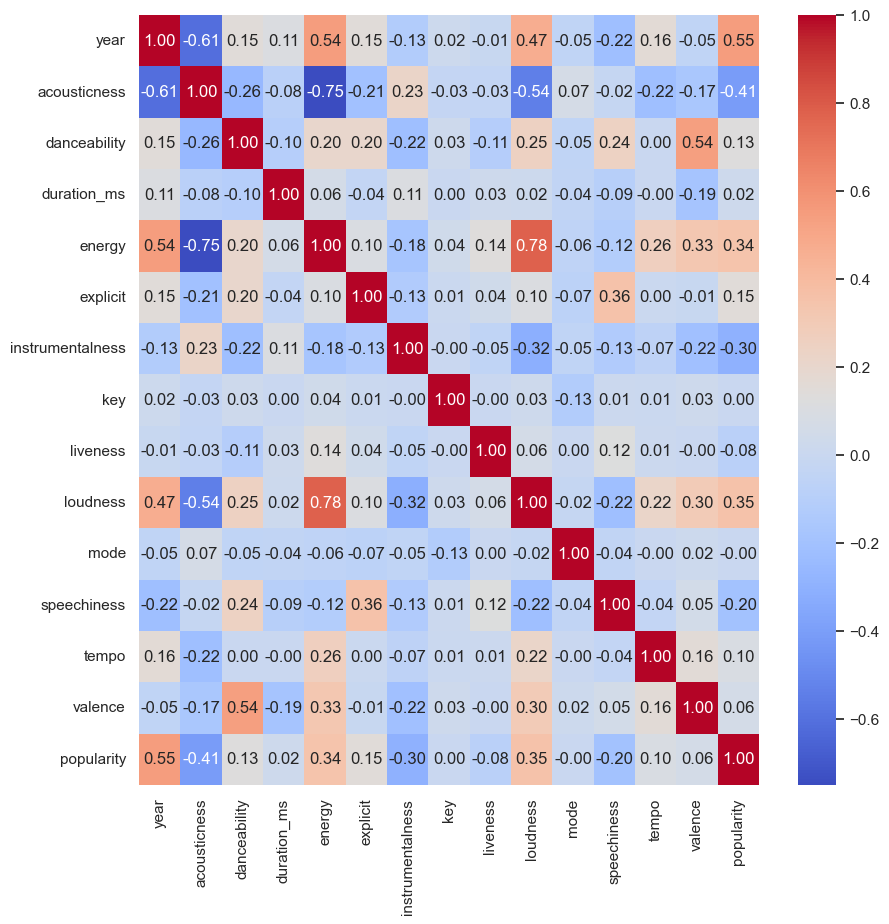

In [102]:
plt.figure(figsize = (10 ,10))
sns.heatmap(pd.concat([Xtrain, ytrain], axis=1).corr(), annot=True, fmt='.2f', cmap="coolwarm")
plt.show()

From the heatmap, where **DARK RED** and **ALMOST WHITE** bins interest us, we see that **energy** correlates with **acousticness** & **loudness**, that is why we decided to drop this feature.

In [103]:
Xtrain = Xtrain.drop(['energy'], axis=1, errors='ignore')

The important thing to mention, happily, this dataset doesn't have any missing values in it

There are a few features, which can be seen as categorical, but all of them (**explicit**, **mode**, **key**) are not 'ordinal', so after changing the dtype to a categorical one and to cat.codes back, we won't receive any difference. We will only 're-lable' them.

Also, looking back at the heatmap, we see some features, that have no correlation with the target variable. Probably they are redundant. But we can't be sure, because 0 correlation doesn't implies independence of two variables, for example:

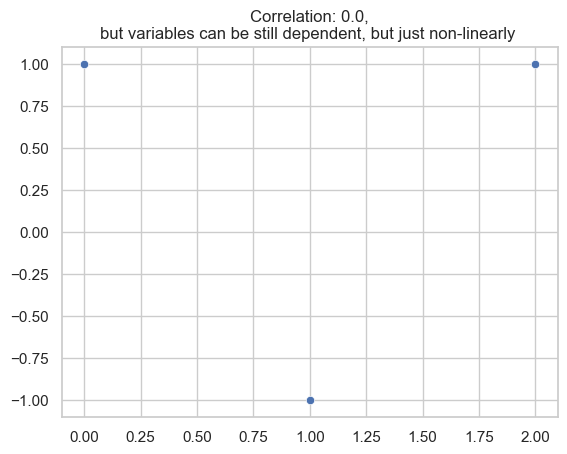

In [104]:
x = np.array([0,1,2])
y = np.array([1,-1,1])

correlation_matrix = np.corrcoef(x,y)

ax = sns.scatterplot(x=x, y=y)
ax.set_title(f"Correlation: {correlation_matrix[0][1]},\nbut variables can be still dependent, but just non-linearly ")
plt.show()

Though correlation is 0, we can see that data which has such distribution may have some non-linear dependency. 

Let's check **mode**, **key** and **duration_ms** features, which have near zero correlation with **popularity** target feature

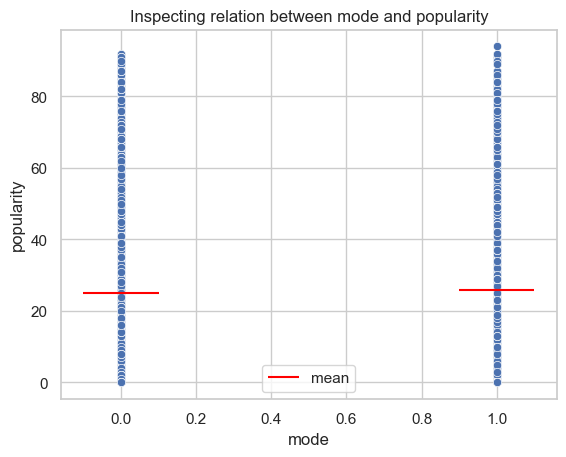

In [105]:
fig, ax = plt.subplots()
sns.scatterplot(x=Xtrain["mode"], y=ytrain, ax=ax)


ax.hlines(
    y=[ytrain[Xtrain["mode"] == 0].median(), ytrain[Xtrain["mode"] == 1].mean()],
    xmin=[-0.1, 0.9],
    xmax=[0.1, 1.1],
    colors=["red"],
    label="mean",
)
ax.set_title("Inspecting relation between mode and popularity")
ax.legend()
fig.show()

As we can see, mode feature really seems to be not dependent on the popularity feature. We draw the mean value so we can at least *roughly* see where the data are more distributed.

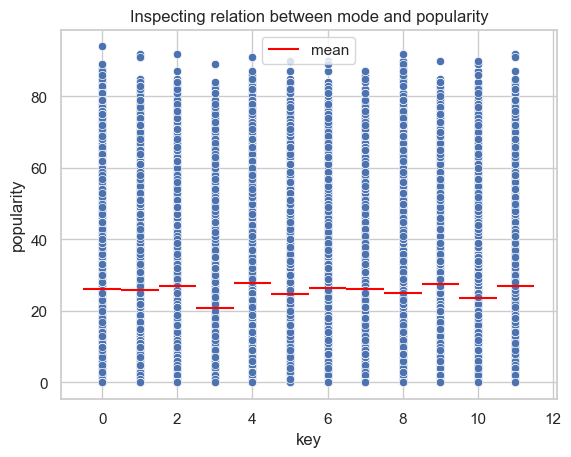

In [106]:
fig, ax = plt.subplots()
sns.scatterplot(x=Xtrain["key"], y=ytrain, ax=ax)

key_val_delta = 0.5
means = []
xmins = []
xmaxes = []

for key in Xtrain["key"].unique():
    means.append(ytrain[Xtrain["key"] == key].mean())
    xmins.append(key - key_val_delta)
    xmaxes.append(key + key_val_delta)

ax.hlines(y=means, xmin=xmins, xmax=xmaxes, colors=["red"], label="mean")

ax.set_title("Inspecting relation between mode and popularity")
ax.legend()
fig.show()

**key** feature also seems to be truly independent on **popularity** feature.

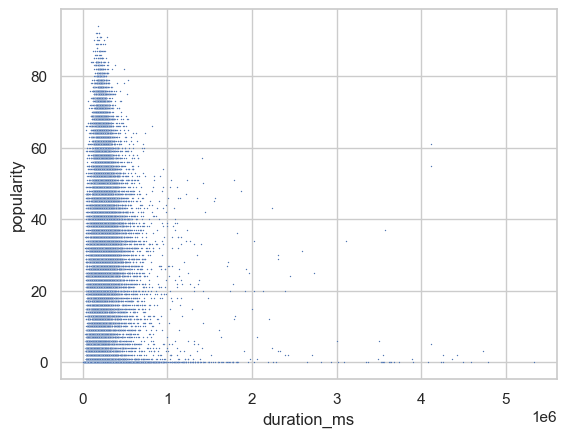

In [107]:
sns.scatterplot(x=Xtrain['duration_ms'], y=ytrain, s=1)
plt.show()

Values that are to the right are outliers, looking upon the left mass we can judge that there is really low dependency between **duration_ms** and **popularity**.

So, **mode**, **key** and **duration_ms** features with low correlation with **popularity** can be dropped:

In [108]:
Xtrain = Xtrain.drop(['mode', 'key', 'duration_ms'], axis=1, errors='ignore')

Now, when only numeric features left, we can see how it is with outliers in our case.

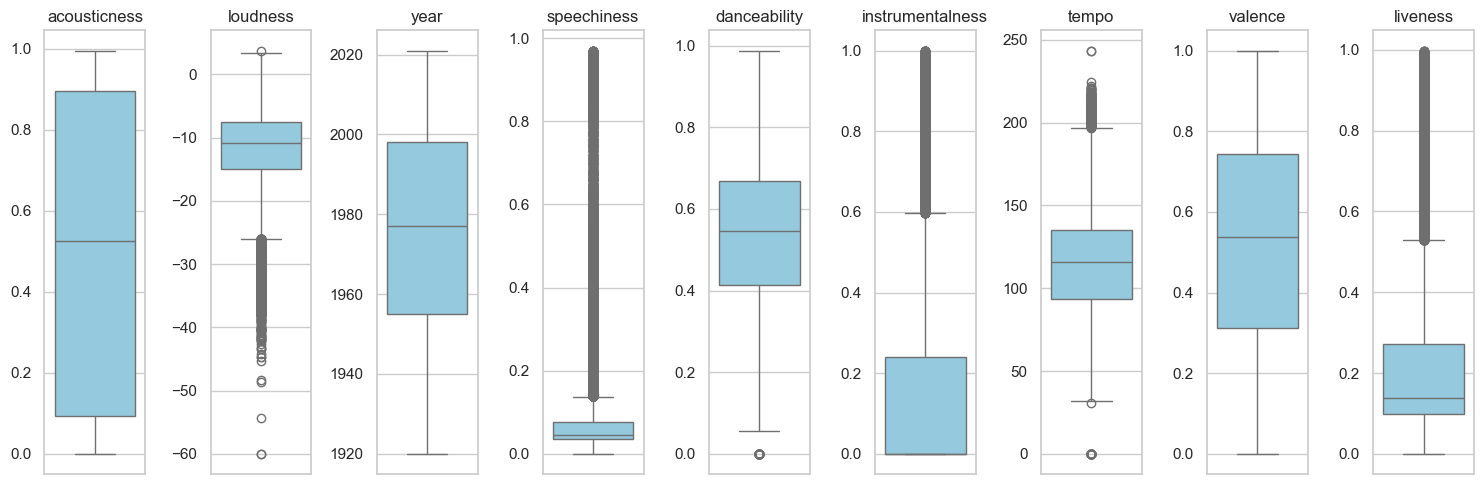

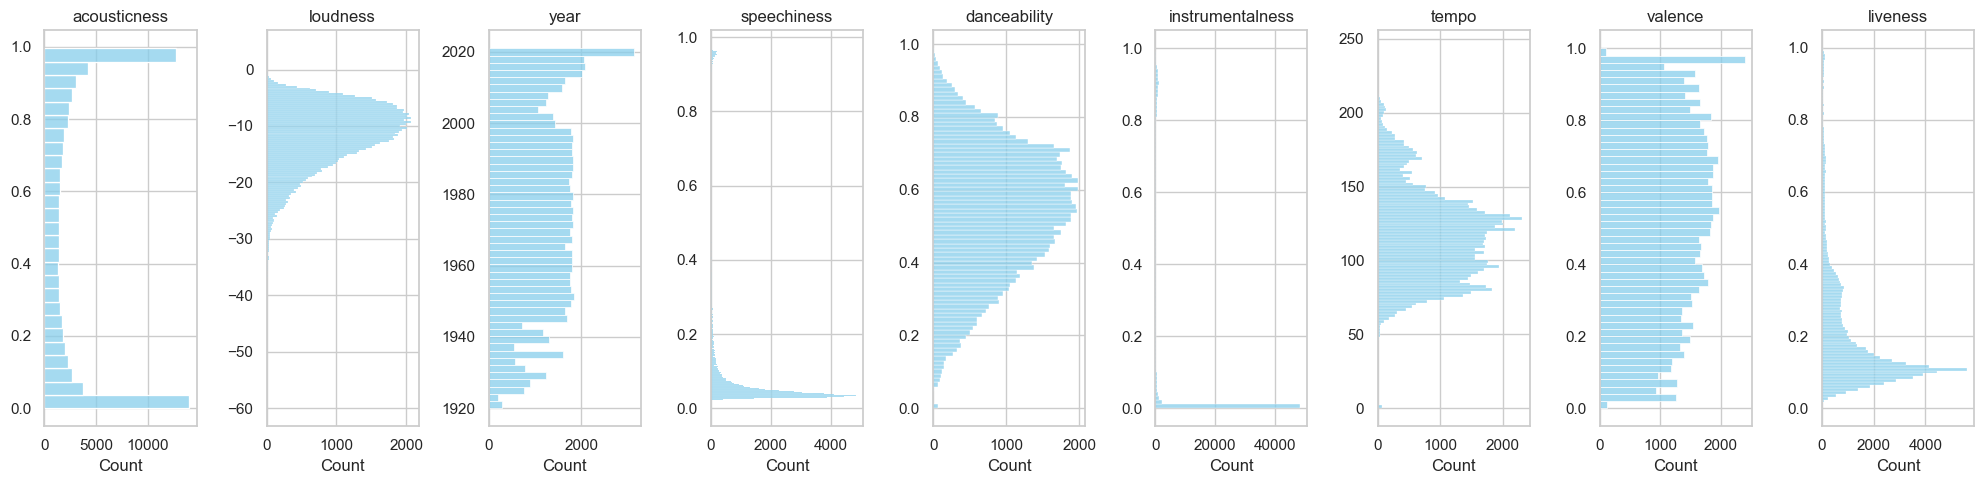

In [109]:
# Visualize all columns, but binary ones
cols = set(Xtrain.columns) - set(['explicit'])

################## BOXPLOT ##################

plt.figure(figsize=(15, 5))

# Iterate through all columns and make graphs for them
for i, column in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=Xtrain[column], color='skyblue')
    plt.ylabel('') # remove default seaborn labes (wrong place)
    plt.title(column) # set matplotlib titles in the right place

# Add layout which makes plot readable
plt.tight_layout()
plt.show()

################## HISTPLOT ##################

plt.figure(figsize=(20, 5))

# Iterate through all columns and make graphs for them
for i, column in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.histplot(y=Xtrain[column], color='skyblue')
    plt.ylabel('') # remove default seaborn labes (wrong place)
    plt.title(column) # set matplotlib titles in the right place
plt.tight_layout()
plt.show()

In [14]:
# The function, which conducts basic feature transformation which was done for the training dataset before
def basic_transf(X:pd.DataFrame, y:pd.Series) -> pd.DataFrame :
    """
    !IMPORTANT!
    This function should be applied at any dataset train/test/valid before you start working with it.
    You can apply your transformations on the dataset BUT ONLY after applying this function on it.

    *this function isn't inplace, it changes the dataset you pass to it returns dataset with changes applied
    """

    # Deleting redundant columns
    X = X.drop(['id','name','artists'], axis=1, errors='ignore')

    # Delete duplicates
    df = pd.concat([X, y], axis=1)
    len_bef = len(df)
    df_nodup = df.drop_duplicates(subset=(set(df.columns)-set(['popularity'])))
    len_aft = len(df_nodup)
    X, y = df_nodup.drop('popularity', axis=1), df_nodup['popularity']
    
    # Drop redundant 'release_date col'
    X = X.drop(['release_date'], axis=1, errors='ignore')
    
    #Delete uncorrelated cols
    X = X.drop(['mode', 'key', 'duration_ms'], axis=1, errors='ignore')

    # Drop highly-correlated columns
    X = X.drop(['energy'], axis=1, errors='ignore')

    return X, y

### Ridge Regression

Ridge regression is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) function. The purpose of this penalty term is to prevent overfitting and to regularize the model by discouraging large coefficient values.

The goal of Ridge Regression is to find coefficients that fit the data well while keeping them as small as possible. The strength of regularization is governed by a parameter called alpha.

#### Finishing data preparation

Lets use developed function to perform basic transformations:

In [533]:
data = pd.read_csv('music.csv')

# Split on features - Xdata and the target - ydata
ydata = data['popularity']
Xdata = data.drop('popularity', axis=1)

# To prevent further "methodological" mistakes, make the split on train, valid and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state = rd_seed, shuffle=True)
Xvalid, Xtest, yvalid, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state = rd_seed, shuffle=True)
print(f"""Shapes of datasets:
train: X:{Xtrain.shape}, y:{ytrain.shape}
valid: X:{Xvalid.shape}, y:{yvalid.shape}
test: X:{Xtest.shape}, y:{ytest.shape}""")

Xtrain, ytrain = basic_transf(Xtrain, ytrain)
Xvalid, yvalid = basic_transf(Xvalid, yvalid)
Xtest, ytest = basic_transf(Xtest, ytest)

Shapes of datasets:
train: X:(77503, 18), y:(77503,)
valid: X:(25834, 18), y:(25834,)
test: X:(25835, 18), y:(25835,)


Boxplot graphs above shows great ammount of outliers in some features. Lets remove them, before we normalize data:

In [534]:
columns= set(Xtrain.columns) - set(['explicit'])
outliers=[]

for col in columns:
    q1 = Xtrain[col].quantile(0.25)
    q3 = Xtrain[col].quantile(0.75)
    # Remove data that lies outside the boundaries 
    min_q = q1-1.5*(q3-q1)
    max_q = q3+1.5*(q3-q1)
    for pos in range(len(Xtrain)):
        if Xtrain[col].iloc[pos] > max_q or Xtrain[col].iloc[pos]< min_q:
            outliers.append(pos)
            
# remove the duplicate values
outliers=set(outliers)
outliers=list(outliers)

# Drop the outliers from our dataset
Xtrain.drop(Xtrain.index[outliers], inplace=True)
ytrain.drop(ytrain.index[outliers], inplace=True)

Now lets look at data types:

In [535]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48305 entries, 7454 to 6558
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              48305 non-null  int64  
 1   acousticness      48305 non-null  float64
 2   danceability      48305 non-null  float64
 3   explicit          48305 non-null  int64  
 4   instrumentalness  48305 non-null  float64
 5   liveness          48305 non-null  float64
 6   loudness          48305 non-null  float64
 7   speechiness       48305 non-null  float64
 8   tempo             48305 non-null  float64
 9   valence           48305 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 4.1 MB


We see that all features have float64 type, - no convertation needed. There are also no missing values. Data is ready to use. 

Lastly, lets look at the graphs of distribution and boxplot to vizualise changes we made:

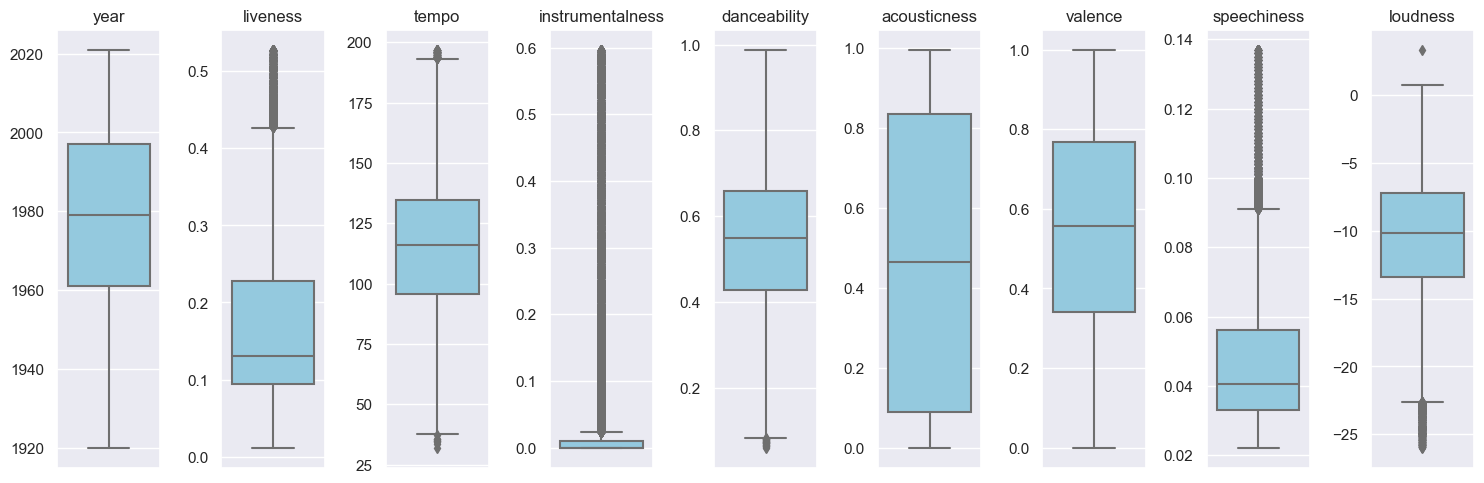

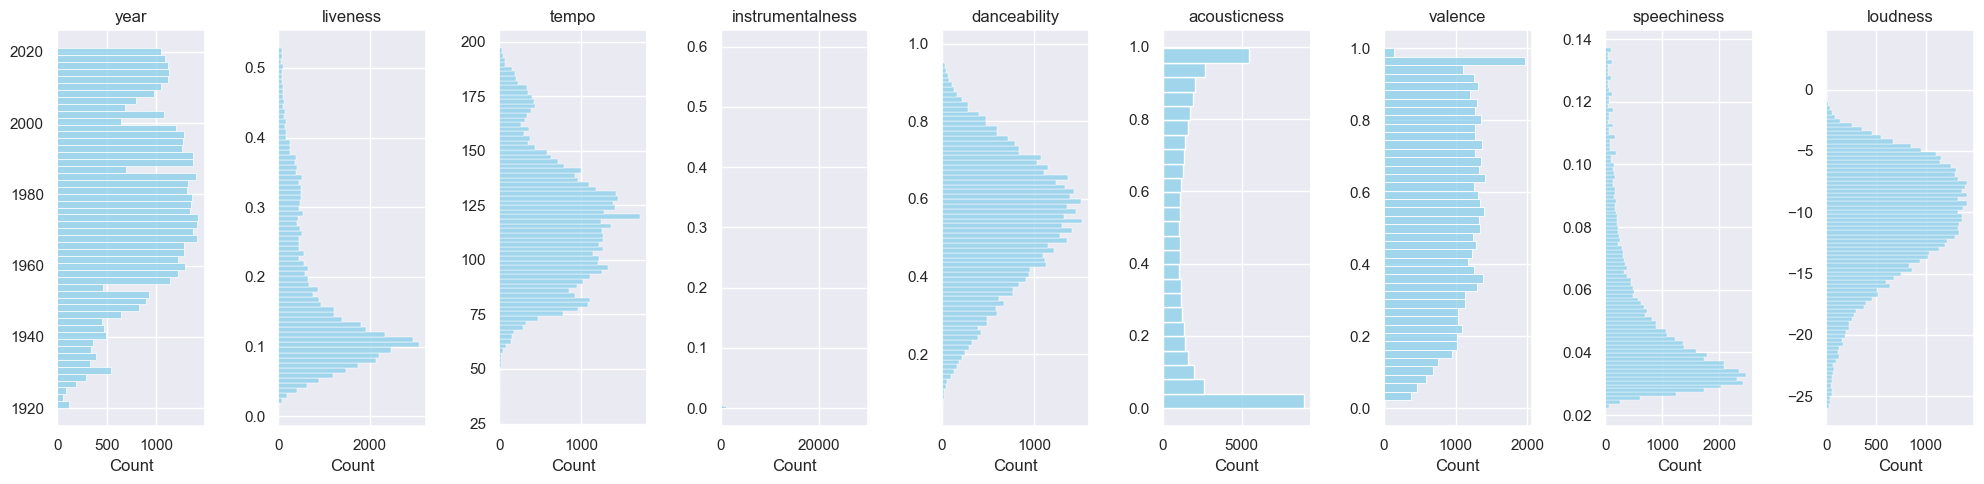

In [536]:
# Visualize all columns, but binary ones
cols = set(Xtrain.columns) - set(['explicit'])

################## BOXPLOT ##################

plt.figure(figsize=(15, 5))

# Iterate through all columns and make graphs for them
for i, column in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=Xtrain[column], color='skyblue')
    plt.ylabel('') # remove default seaborn labes (wrong place)
    plt.title(column) # set matplotlib titles in the right place

# Add layout which makes plot readable
plt.tight_layout()
plt.show()

################## HISTPLOT ##################

plt.figure(figsize=(20, 5))

# Iterate through all columns and make graphs for them
for i, column in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.histplot(y=Xtrain[column], color='skyblue')
    plt.ylabel('') # remove default seaborn labes (wrong place)
    plt.title(column) # set matplotlib titles in the right place
plt.tight_layout()
plt.show()

#### Feature tuning

We're going to tune two hyperparameters:

- alpha - Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float

- solver - Solver to use in the computational routines. Values to test are: {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’}

  - ‘auto’ chooses the solver automatically based on the type of data.

  - ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients.

  - ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.

  - ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr.

  - ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg.

For more precise description please visit documentation[2]

In Ridge Regression, a common loss function used during the optimization process is a combination of the Ordinary Least Squares (OLS) loss and a regularization term. The objective is to minimize the sum of squared differences between the predicted values and the actual values, while also penalizing large coefficients to prevent overfitting.

The loss function for Ridge Regression is defined as follows:

$$ L(\mathbf{w}) = \text{OLS Loss} + \alpha \sum_{j=1}^{p} w_j^2 $$

Here:

- $ L(\mathbf{w}) $ represents the overall loss function.
- $\text{OLS Loss}$ is the Ordinary Least Squares loss. It measures the sum of squared differences between the actual and predicted values.
- $\alpha$ is the regularization parameter, controls the strength of the regularization. Larger values of $\alpha$ result in stronger regularization.
- $p$ is the number of coefficients in the model.
- $w_j$ represents the j-th coefficient of the linear regression model.

Here we will try to find optimal values of hyperparameters by testing all possible combinations. We will fit Ridge regression model using each combination and return accuracy of this model on train and validation sets.

For accuracy metric we will use RMSE (Root Mean Squared Error).
It takes the square root of the Mean Squared Error. Mathematically, RMSE is represented as:
$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$
RMSE is frequently used as a metric in regression tasks, particularly when we want the error value to be in the same units as the target variable. 

First, for several different values of $\alpha > 0$, we will plot the validation RMSE and estimate a suitable interval in which to find the optimal value.

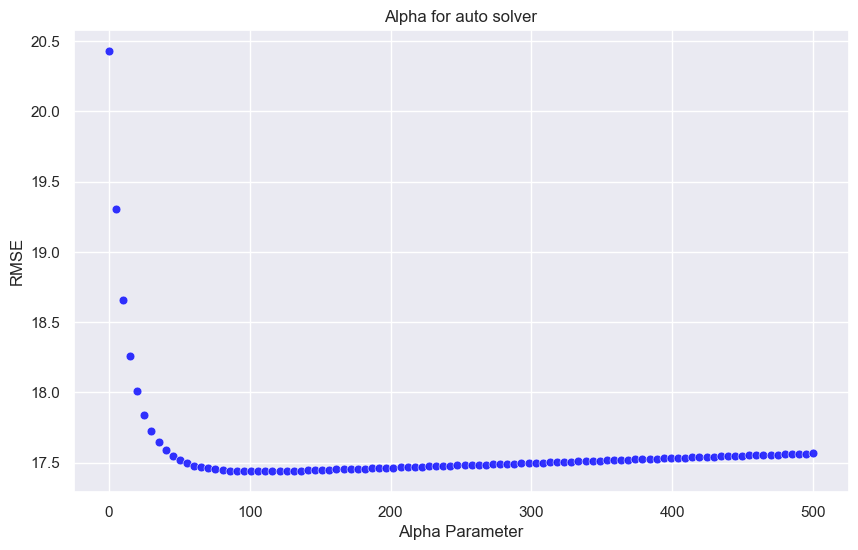

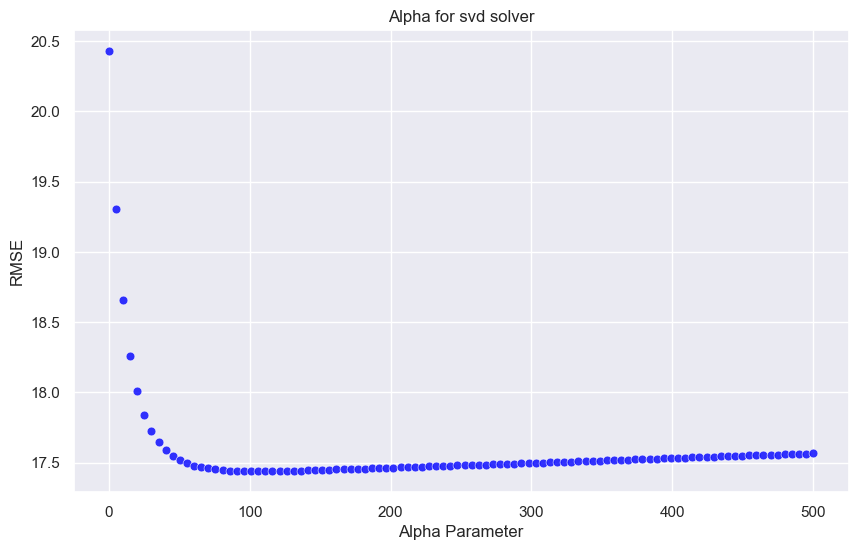

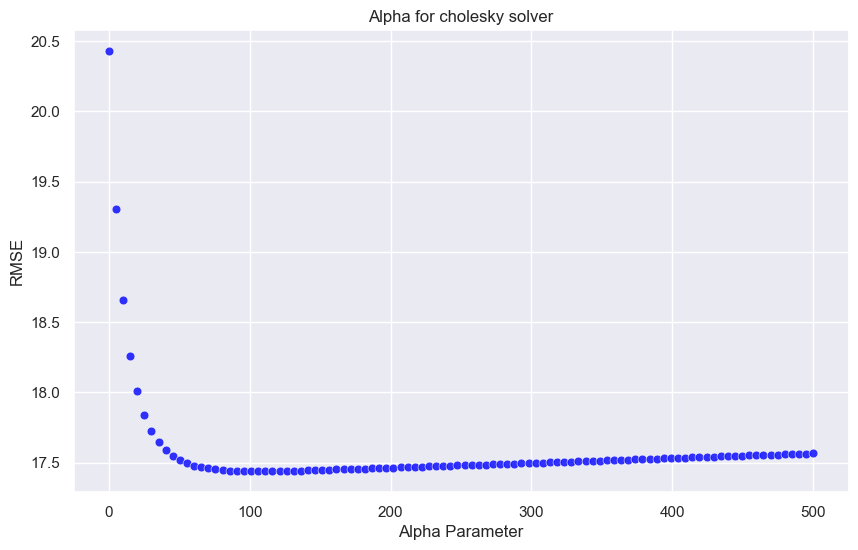

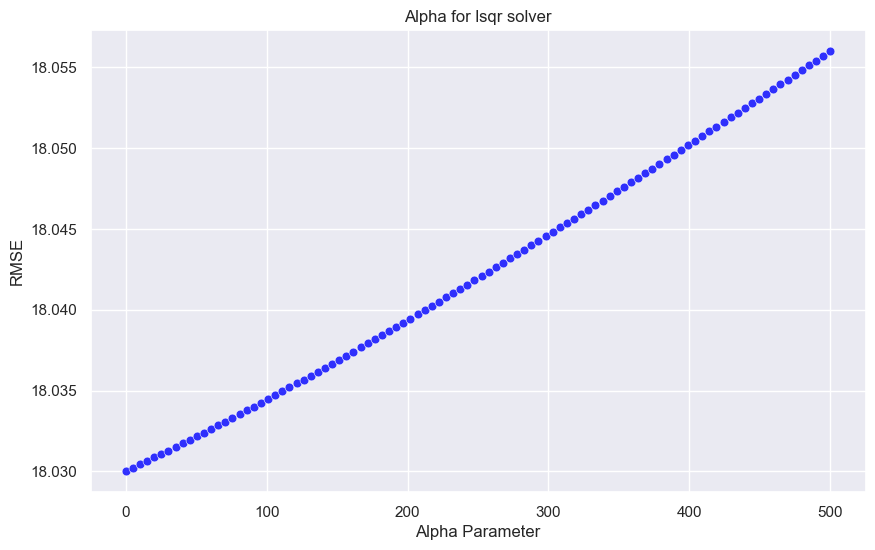

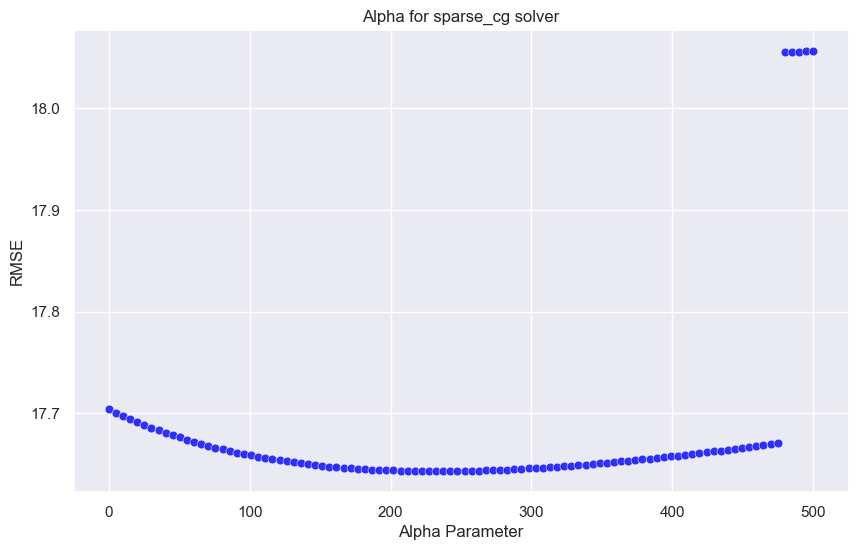

In [537]:
alphas = np.linspace(0.01,500,100)
options = ["auto","svd", "cholesky", "lsqr", "sparse_cg"]
for option in options:
      alphas_res = [ridgemodel_eval(alpha,option) for alpha in alphas]
      df_tmp = pd.DataFrame({'Alpha': alphas, 'RMSE': alphas_res})

      # Set Seaborn style
      sns.set(style="darkgrid")

      # Create a scatter plot
      plt.figure(figsize=(10, 6))
      sns.scatterplot(x='Alpha', y='RMSE', data=df_tmp, color='blue', s=40, alpha=0.8)

      # Set plot labels and title
      plt.xlabel('Alpha Parameter')
      plt.ylabel('RMSE')
      plt.title(f'Alpha for {option} solver')

      # Show the plot
      plt.show()

For most solver options, optimal value of alpha lies within range (0.1,150). Now let's try all possible combinations:

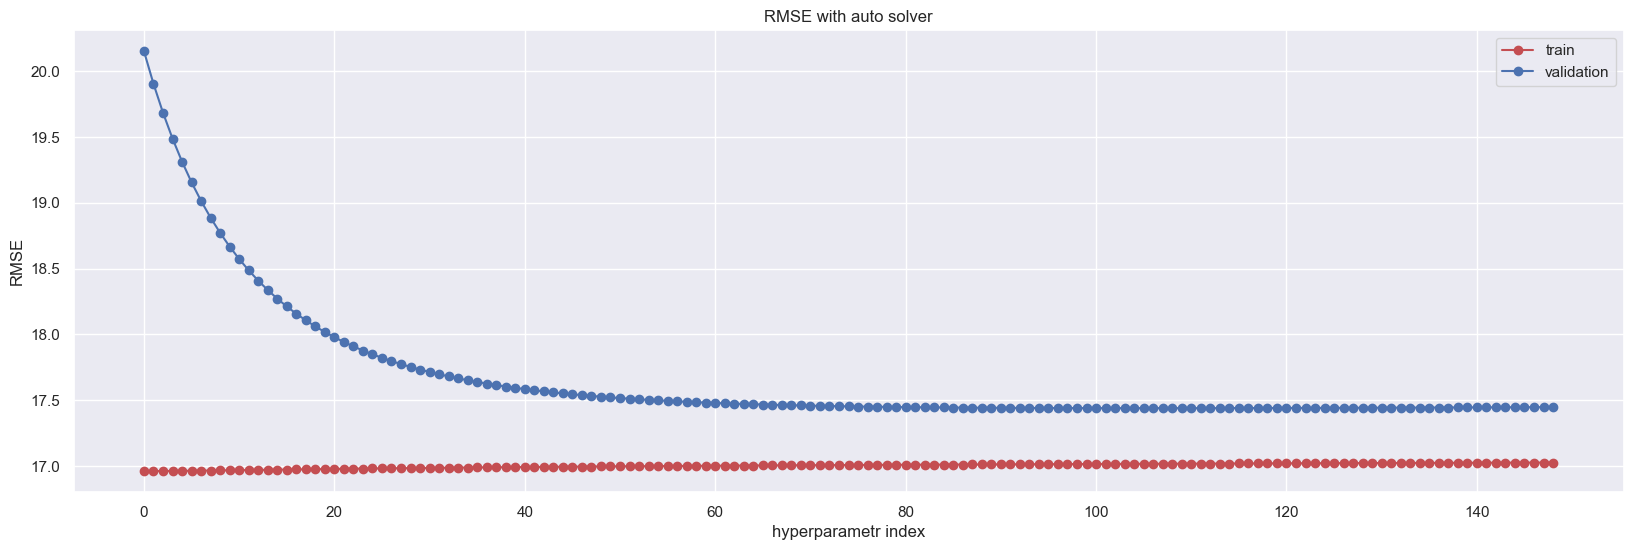

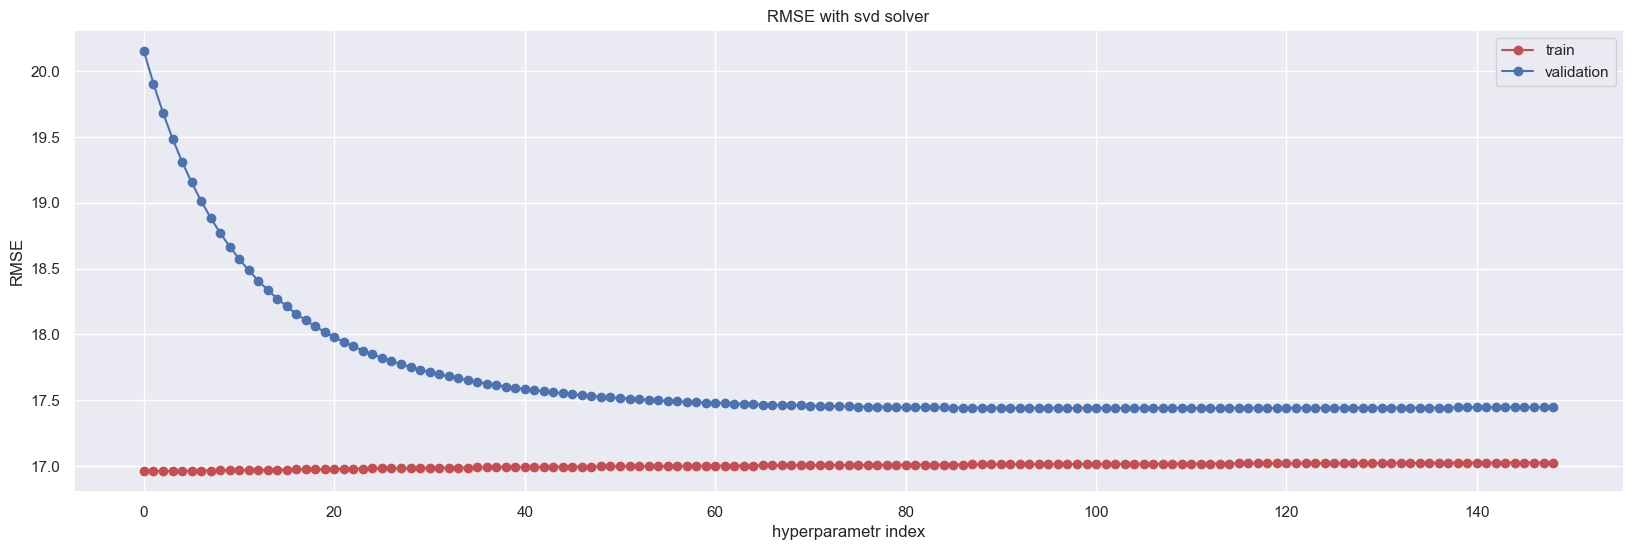

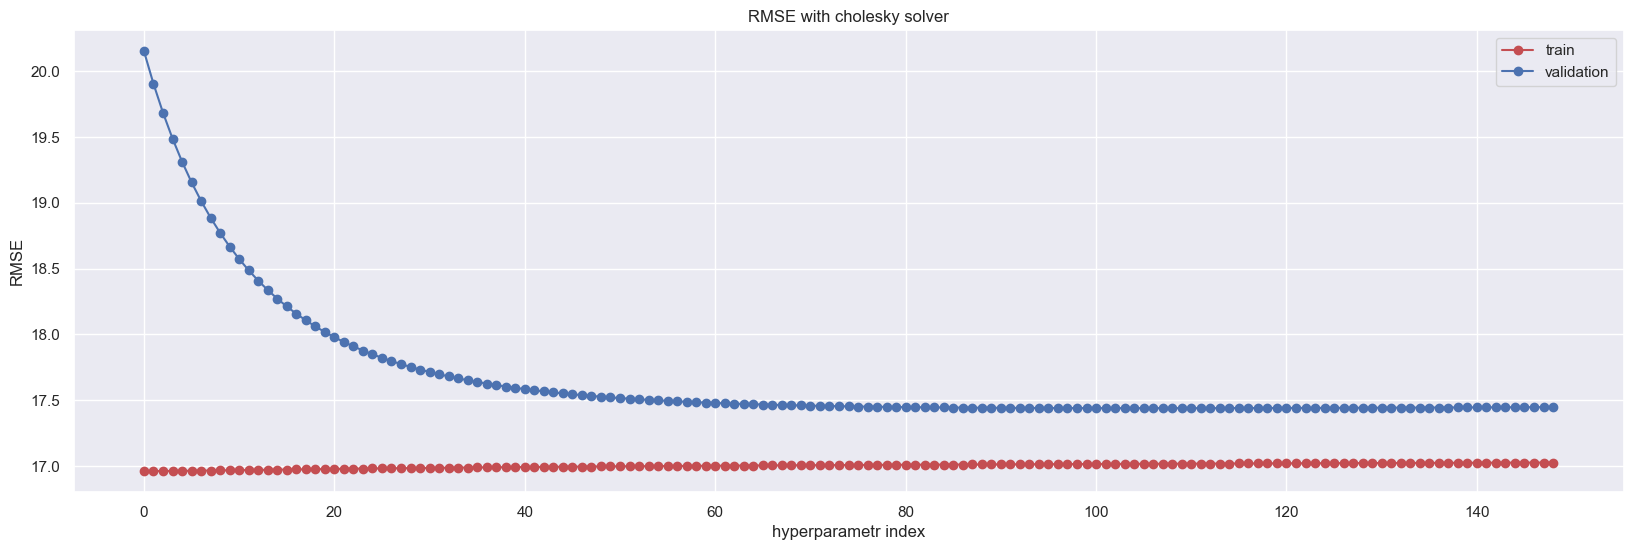

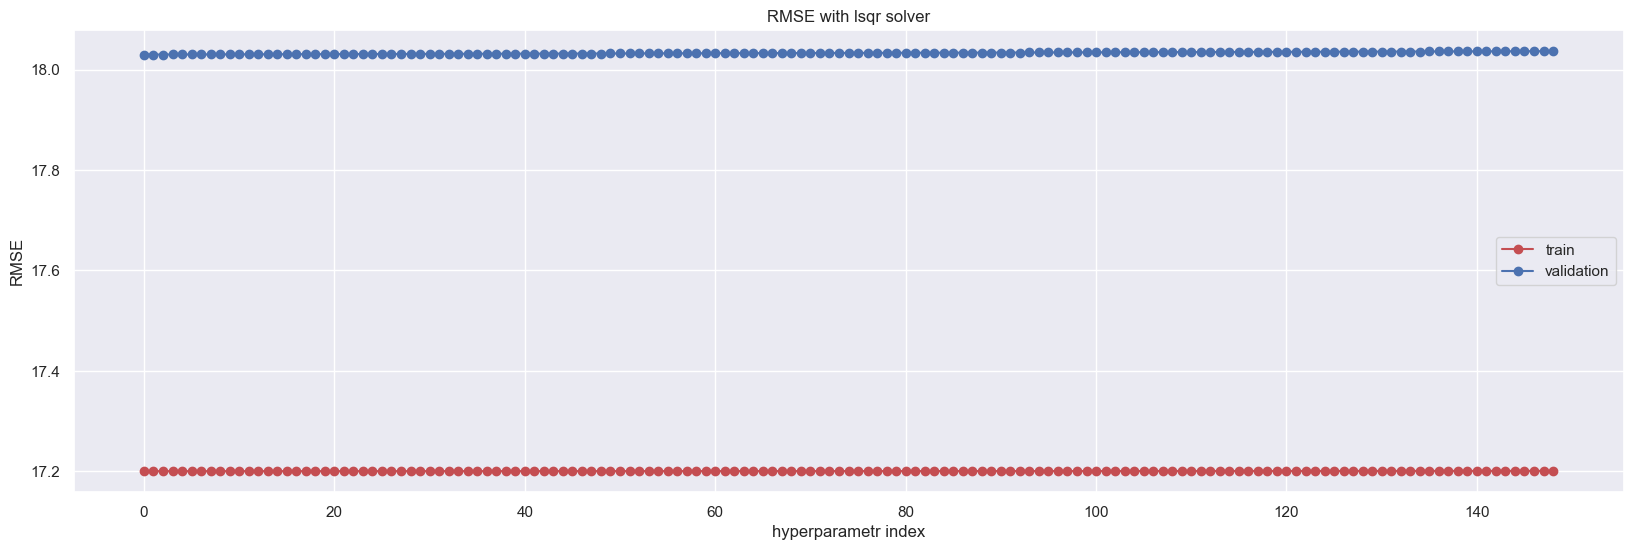

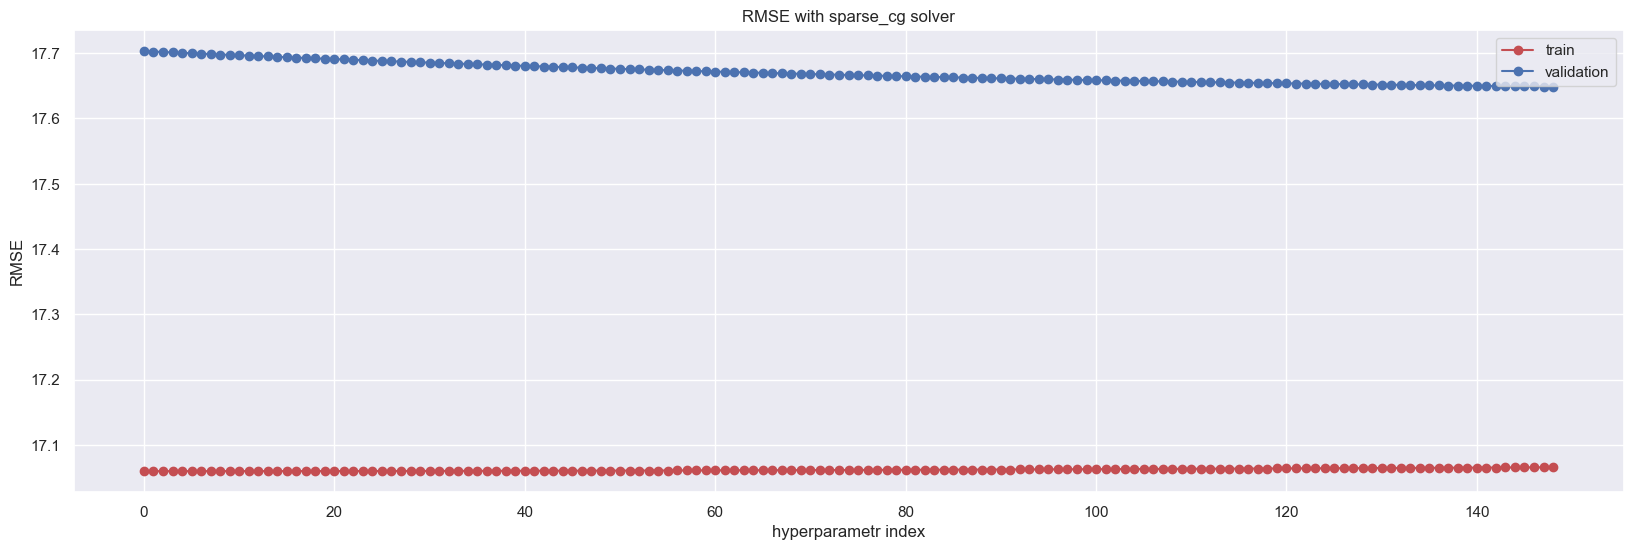

In [538]:
best_params_val = {}
best_metric_val = np.inf

# ParameterGrid uses wrong order => double cycle is used
for opt1 in ["auto","svd", "cholesky", "lsqr", "sparse_cg"]:
      train_acc = []
      val_acc = []
      index = 0
      for opt2 in range(1,150):
            param = {'alpha':opt2,'solver':opt1}
            model = Ridge(**param,copy_X=True,random_state=rd_seed)
            model.fit(Xtrain,ytrain)
            train_acc.append(metrics.mean_squared_error(ytrain, model.predict(Xtrain), squared = False))
            RMSE_val = metrics.mean_squared_error(yvalid, model.predict(Xvalid), squared = False)
            val_acc.append(RMSE_val)
            if (RMSE_val < best_metric_val):
                  best_params_val = param
                  best_metric_val = RMSE_val
                  best_param_index = index
            index += 1

      plt.figure(figsize=(20,6))
      plt.plot(train_acc,'or-')
      plt.plot(val_acc,'ob-')
      plt.xlabel('hyperparametr index')
      plt.ylabel('RMSE')
      plt.legend(['train', 'validation'])
      plt.title(f"RMSE with {opt1} solver")

Here we can clearly see, that very small values of alpha $\alpha$ results in bigger mistake. Coeficients are not penalized enough, which makes prediction more inaccurate. By increasing $\alpha$, we reach point where error is minimum. After that point, further increase of the parameter only penalizes larger values of coefficients more strongly, again worsening the prediction. 

Solver choice is important too: for example, "lsqr" solver can not decrease RMSE under 18. To reach our best RMSE it will need incredibly high alpha value, which will only hurt.

In [539]:
print(f"We found best hyperparametrs {best_params_val} with index {best_param_index} and validate RMSE {best_metric_val:.6f}.")

We found best hyperparametrs {'alpha': 106, 'solver': 'auto'} with index 105 and validate RMSE 17.439858.


Now we can train best model. Since we have more than 3 features, vizualising all of them at once is impossible. Later we will show how does our model perform with unseen before data.

In [540]:
best_ridge = Ridge(**best_params_val,copy_X=True,random_state=rd_seed)
# Now we can concatenate train and validation datasets for more data to train on
best_ridge.fit(pd.concat([Xtrain,Xvalid],axis=0),pd.concat([ytrain,yvalid],axis=0))

Ridge(alpha=106, random_state=45)

#### Evaluation

##### Error visualization

Firstly lets see RMSE on test set:

In [650]:
RMSE_test = metrics.mean_squared_error(ytest, best_ridge.predict(Xtest), squared = False)
print(f"Model with best parameters\nTest RMSE {RMSE_test:.6f}.")

Model with best parameters
Test RMSE 17.189110.


Now lets see how good our prediction is. Starting with graph of predicted and real values:

In [651]:
y_pred = best_ridge.predict(Xtest)
ytest.info()

<class 'pandas.core.series.Series'>
Int64Index: 25757 entries, 97920 to 58190
Series name: popularity
Non-Null Count  Dtype
--------------  -----
25757 non-null  int64
dtypes: int64(1)
memory usage: 402.5 KB


There is 25 thousand points - lets select a few of them:

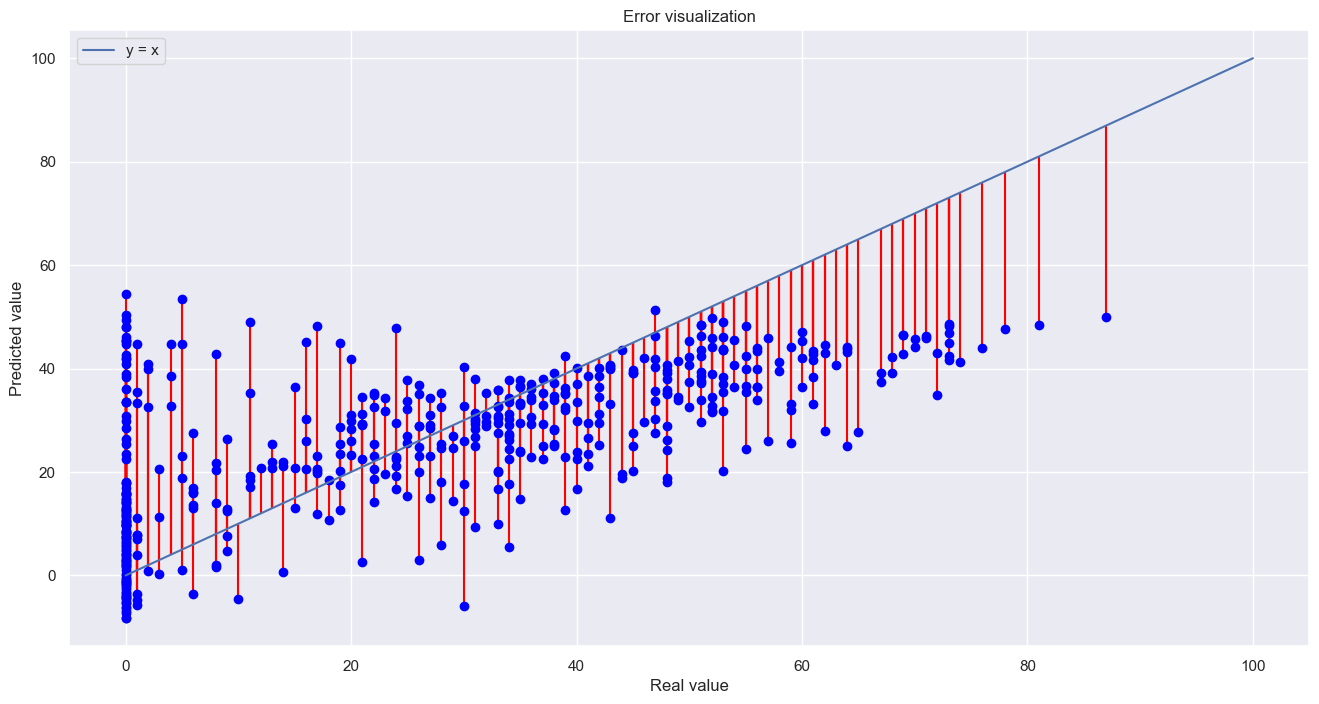

In [652]:
sns.set_style('darkgrid')
error_table = pd.DataFrame({"Real":list(ytest.values),"Prediction":list(y_pred)})
idx = random.sample(list(error_table.index),k=500)
y_real = [error_table['Real'][i] for i in idx]
y_predicted = [error_table['Prediction'][i] for i in idx]
fig, ax = plt.subplots(figsize=(16,8))

ax.vlines(y_real, y_real, y_predicted, color="red", zorder=1)
ax.plot([0,100],[0,100], label='y = x')
ax.scatter(y_real, y_predicted, color="blue")

ax.set_xlabel('Real value')
ax.set_ylabel('Predicted value')
ax.legend()
_ = ax.set_title('Error visualization')

##### Error table

Now it is time to create error table:

In [653]:
ytrain_pred = best_ridge.predict(Xtrain)
yvalid_pred = best_ridge.predict(Xvalid)
ytest_pred = best_ridge.predict(Xtest)

In [654]:
def create_error_table(yreal, ypred, subset):
    df_tmp = pd.DataFrame()
    df_tmp['Real'] = yreal
    df_tmp['Prediction'] = ypred
    df_tmp['Error'] = yreal - ypred
    df_tmp['Dataset'] = subset
    return df_tmp
    
error_table = pd.concat([
    create_error_table(ytrain, ytrain_pred, 'train'),
    create_error_table(yvalid, yvalid_pred, 'validation'),
    create_error_table(ytest, ytest_pred, 'test'),
])

display(error_table.head())
error_table.describe()

,Real,Prediction,Error,Dataset
7454,27,30.578226,-3.578226,train
75372,29,26.835784,2.164216,train
99807,41,39.556570,1.443430,train
31360,72,44.595585,27.404415,train
50987,57,37.821792,19.178208,train


,Real,Prediction,Error
count,99829.000000,99829.000000,99829.000000
mean,28.127328,28.099933,0.027395
std,21.585982,13.398301,17.129285
min,0.000000,-24.906168,-57.408085
25%,6.000000,18.980007,-8.548875
50%,29.000000,29.880583,0.734543
75%,44.000000,38.139750,10.870514
max,96.000000,58.195835,65.084099


Now lets vizualise error distribution using our error table and seaborn:

<AxesSubplot:xlabel='Dataset', ylabel='Error'>

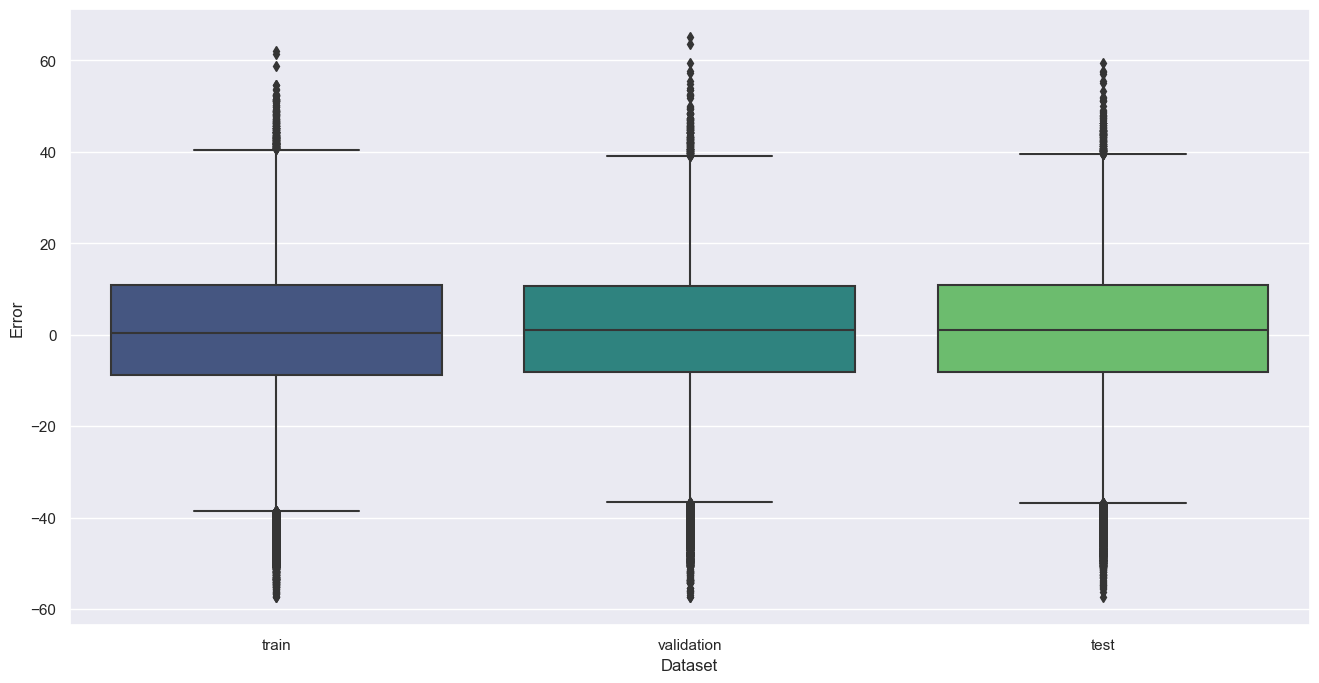

In [671]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=error_table,x='Dataset',y="Error",palette='viridis',ax=ax)

<AxesSubplot:xlabel='Dataset', ylabel='Error'>

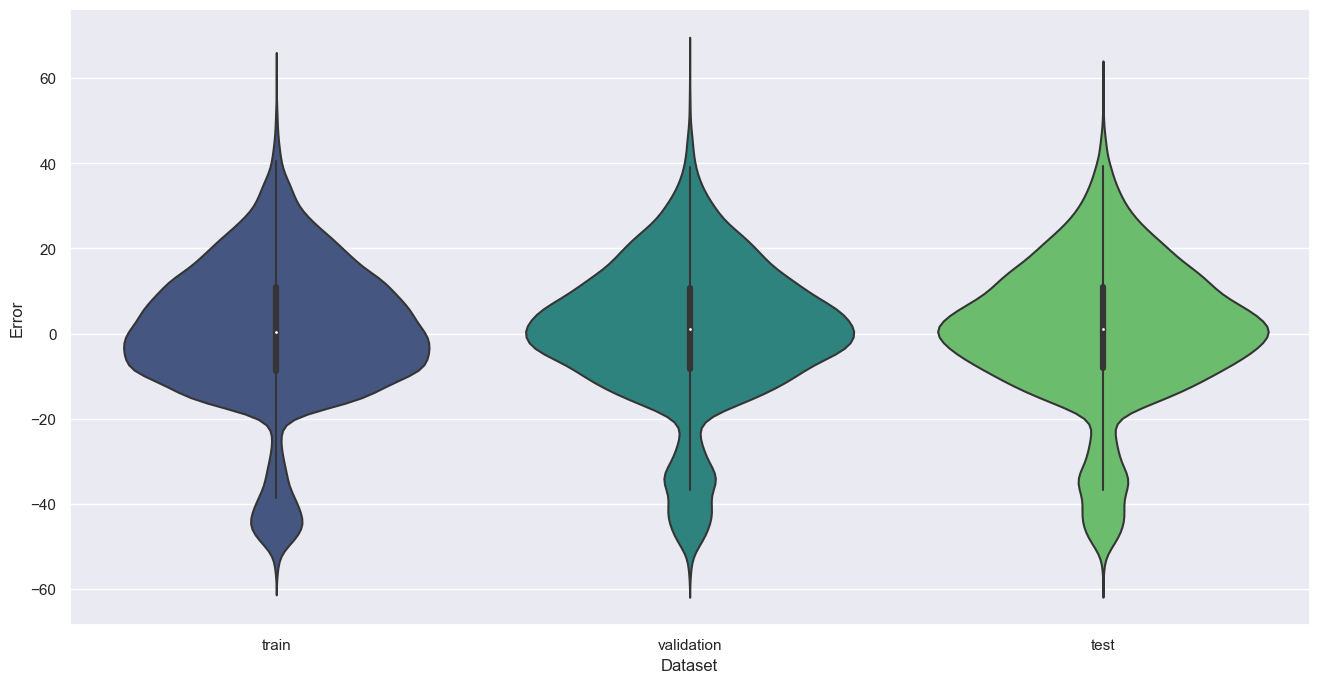

In [714]:
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=error_table,x='Dataset',y="Error",palette='viridis',ax=ax)

Text(0.5, 1.0, 'Error distribution')

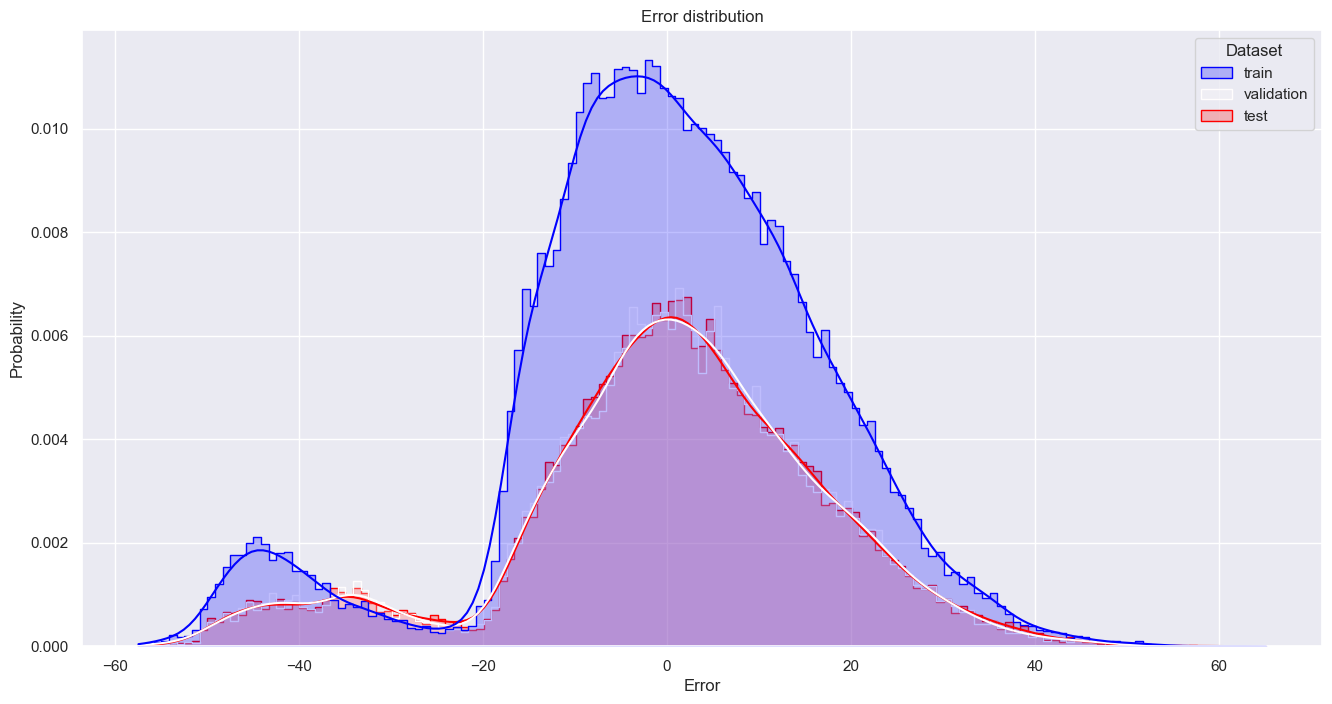

In [720]:
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data=error_table, x='Error', hue='Dataset', kde = True, ax=ax,palette='seismic',stat='probability',element='step')
ax.set_title("Error distribution")

The graph shows, that error distribution can not be described using Normal distribution. Interesting detail: errors with high value tend to be negative (range from -40 to -60) rather then positive

### AdaBoost

AdaBoost - Adaptive Boosting - is an ensemble model which uses technique similar to bagging called **boosting**, in which we assign weights for each data point in the dataset and special weight for each estimator. Very important characteristic of boosting technique is that estimators are ordered, each next estimator is trained with weights calculated using the previous estimator, enforcing next model to train better on data points that are classified incorrectly or (for regression task) predicted with too big error.

We will use AdaBoost for regression task. For that purpose there is [R2 algorithm](https://pdfs.semanticscholar.org/8d49/e2dedb817f2c3330e74b63c5fc86d2399ce3.pdf), which uses boosting technique, but with continuous labels.

Though bagging can work with many estimators, for boosting we need model to be able to use weighted samples - because we want to weight our datapoints (samples). 

We will use **Decision Tree Regressor** model as our estimator class, because DT can handle weighted samples.

#### Data preparation

First of all, let's split data and perform basic transformations:

In [15]:
data = pd.read_csv('music.csv')

# Split on features - Xdata and the target - ydata
ydata = data['popularity']
Xdata = data.drop('popularity', axis=1)

# To prevent further "methodological" mistakes, make the split on train, valid and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state = rd_seed, shuffle=True)
Xvalid, Xtest, yvalid, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state = rd_seed, shuffle=True)

print(f"""Shapes of datasets:
train: X:{Xtrain.shape}, y:{ytrain.shape}
valid: X:{Xvalid.shape}, y:{yvalid.shape}
test: X:{Xtest.shape}, y:{ytest.shape}""")

Xtrain, ytrain = basic_transf(Xtrain, ytrain)
Xvalid, yvalid = basic_transf(Xvalid, yvalid)
Xtest, ytest = basic_transf(Xtest, ytest)

Shapes of datasets:
train: X:(77503, 18), y:(77503,)
valid: X:(25834, 18), y:(25834,)
test: X:(25835, 18), y:(25835,)


In [16]:
Xtrain.sample(5, random_state=rd_seed)

,year,acousticness,danceability,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence
20957,1958,0.7880,0.567,0,0.000000,0.2250,-11.693,0.0598,134.619,0.377
40133,1985,0.0323,0.625,0,0.000050,0.1020,-9.301,0.0285,117.345,0.678
112911,2015,0.0857,0.637,0,0.925000,0.1720,-7.438,0.1330,140.000,0.576
95471,1961,0.9930,0.441,0,0.881000,0.0878,-21.947,0.0507,122.296,0.040
80368,1961,0.9720,0.467,0,0.000929,0.1110,-17.611,0.0442,110.666,0.145


Data are already relatively good as they are now. From the exploration analysis from the begining, though we can observe a lot of outliers, decision trees are capable to deal with them, so that is not the problem.

In [17]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76931 entries, 7454 to 121803
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              76931 non-null  int64  
 1   acousticness      76931 non-null  float64
 2   danceability      76931 non-null  float64
 3   explicit          76931 non-null  int64  
 4   instrumentalness  76931 non-null  float64
 5   liveness          76931 non-null  float64
 6   loudness          76931 non-null  float64
 7   speechiness       76931 non-null  float64
 8   tempo             76931 non-null  float64
 9   valence           76931 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 6.5 MB


There are no missing values, datatypes are suitable for our model.

#### Visualization of how DT handle non-linear dependency

While analysing data, one interesting question occured - how we can handle variables that have non-linear dependency with our target variable?

To answer this question, lets create some synthetic data for experimenting.

In [26]:
X, c = make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=rd_seed)

In [27]:
X0, y0= X[c==0][:, 0], X[c==0][:, 1]
X1, y1 = X[c==1][:, 0], X[c==1][:, 1]
X2, y2 = X[c==2][:, 0], X[c==2][:, 1]

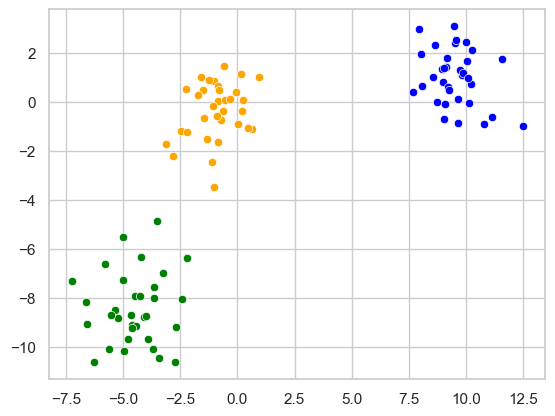

In [28]:
sns.scatterplot(x=X0, y=y0, color='blue')
sns.scatterplot(x=X1, y=y1, color='green')
sns.scatterplot(x=X2, y=y2, color='orange')
plt.show()

Let's move our blobs a little bit to simulate some non-linear joint distribution between variable X and variable y.

In [29]:
X1 += 8
y0 -= 2

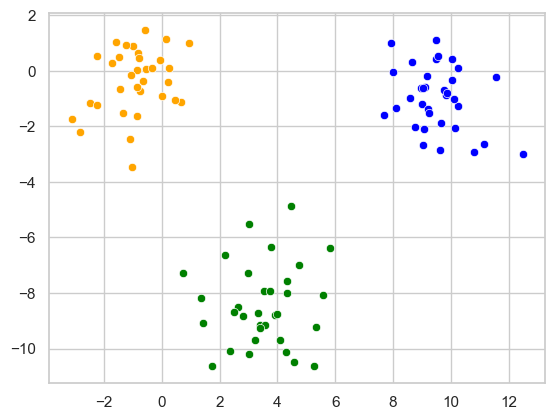

In [30]:
sns.scatterplot(x=X0, y=y0, color='blue')
sns.scatterplot(x=X1, y=y1, color='green')
sns.scatterplot(x=X2, y=y2, color='orange')
plt.show()

Now lets imagine we have such data in our dataset, which has only one feature X and target variable y:

In [31]:
X = np.concatenate((X0, X1, X2))
y = np.concatenate((y0, y1, y2))

In [32]:
print(f"Correlation: {np.corrcoef(X, y)[0][1]:.2f}")

Correlation: 0.03


Clearly there is very weak linear dependency between our data.

For Decision Trees such data are not a problem, because the CART algorithm can use same feature for more splits, so it can very well split our data and handle non-linearity.

Let's just create some simple decision tree and visualize its splits:

In [33]:
X_df = pd.DataFrame(data=X, columns=['X'])
y = pd.Series(y)

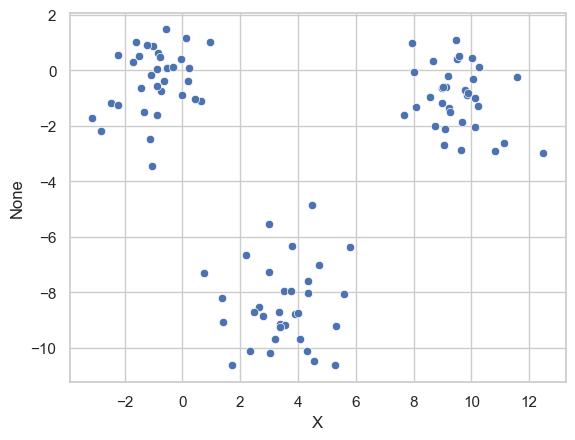

In [34]:
sns.scatterplot(x=X_df["X"], y=y)
plt.show()

Let's see how CART algorithm used for regression decision trees will split our data and let's evaluate it.

In [35]:
reg_DT = DecisionTreeRegressor(max_depth=2, random_state=rd_seed)
reg_DT.fit(X=X_df.values, y=y)

DecisionTreeRegressor(max_depth=2, random_state=45)

In [ ]:
viz = dtreeviz.model(
    model=reg_DT,
    X_train=X_df,
    y_train=y,
    feature_names=X_df.columns,
    target_name='y'
)

viz.view(scale=2)


Because on the gitlab for some reason this plot is not rendered properly, thus we will use saved image. Because we have a fixed random state, the plot will be always the same.

![tree_viz](adaboost/experiment_dtreeviz_rd_45.png)

In [37]:
rmse = metrics.mean_squared_error(y_true=y, y_pred=reg_DT.predict(X=X_df.values), squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 1.53


As we can see, DT can very well handle this data - after splitting it in two parts, it can use same feature to split another part in two, so it can easily overcome non-linearity.

This means we don't have to be worried about non-linear features. Also it shows that correlation coefficient can be misleading and though it shows low correlation, joint distribution of target variable and feature can be well predicted by some non-linear relation, just as we showed it above.

So, let's explore each feature if we can find something interesting there:

In [38]:
features = list(Xtrain.columns)
n_features = len(features)
print(f"Features: {features}")
print(f"Features number: {n_features}")

Features: ['year', 'acousticness', 'danceability', 'explicit', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
Features number: 10


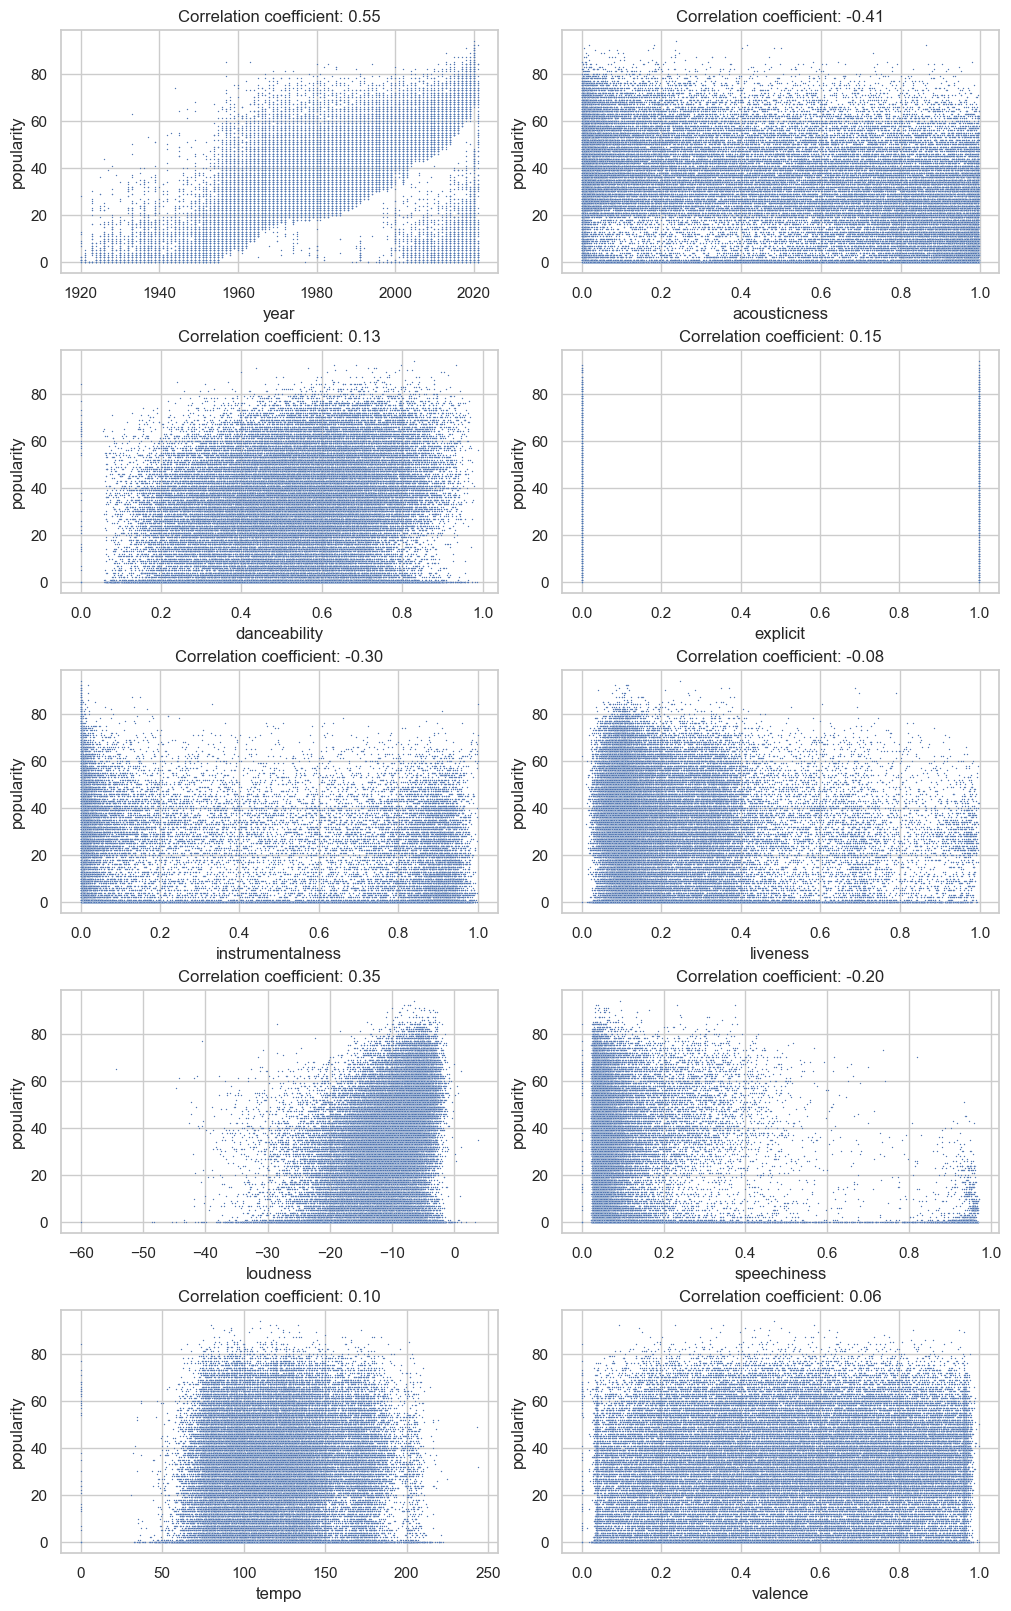

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=2, constrained_layout=True, figsize=(10,16))
for i in range(0, 10):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    feature = Xtrain[features[i]]
    target = ytrain
    correlaion = np.corrcoef(feature, target)[0][1]
    
    ax.set_title(f"Correlation coefficient: {correlaion:.2f}")
    
    sns.scatterplot(x=feature, y=target, ax=ax, s=1)
fig.show()

As we can see, some features, like **valence** - have low correlation with popularity and from the joint distribution we can guess that there is really low dependency. 

But for example with **instrumentalness** we can guess that there is some non linearity, beacuse we can see two masses on the left and on the right.

In overall, there is nothing significantly noticeable, that would need some actions from us. So let's leave everything as it is and start training. 

#### Training

AdaBoost regressor with decision trees have all hyperparameters that have decision trees for regression task plus hyperparameters for R2 boosting algorithm and ensemble model. All hyperparameters and what they mean you can find in documentaion[4]

We are going to tune these hyperparameters:
- AdaBoost:
    - n_estimators - the **maximum** number of models. The final number of trained models can be less because the last model has perfect fit and no error.
- Decision Tree Regressor:
    - max_depth - maximum depth of the tree.
    - max_features - the number of features to consider when looking for the best split.

We could finetune much more hyperparameters, but boosting is computationaly complex, many hyperparameter combinations can very significnalty slow down the overall training.

For error metric function we will use RMSE (Root Mean Squared Error), as it was represented earlier with the Ridge regression.

We will use ParameterGrid from scikit learn to create all hyperparameter combinations.

In [40]:
param_grid = {
    "max_depth": range(1, 20, 5),
    "max_features": range(1, n_features + 1, 2),
    "n_estimators": range(10, 50 + 1, 10),
}

param_comb = ParameterGrid(param_grid=param_grid)

params_count = len(param_comb)
print(f"Totally hyperparameters combinations: {params_count}")


Totally hyperparameters combinations: 100


100 hyperparameters will suffice. Ensemble model are computationally very demanding, especially with dataset where we have tens of thousands of data.

In [47]:
train_metric = []
val_metric = []

for params in param_comb:
    max_depth = params.pop("max_depth")
    max_features = params.pop("max_features")
    params["estimator"] = DecisionTreeRegressor(
        max_depth=max_depth, max_features=max_features, random_state=rd_seed
    )
    model = AdaBoostRegressor(**params, random_state=rd_seed)
    model.fit(X=Xtrain, y=ytrain)

    val_metric.append(
        metrics.mean_squared_error(
            y_true=yvalid, y_pred=model.predict(Xvalid), squared=False
        )
    )
    train_metric.append(
        metrics.mean_squared_error(
            y_true=ytrain, y_pred=model.predict(Xtrain), squared=False
        )
    )

Training with all hyperparameters was computationally very long. Let's save results in pickle, so we can load it fastly in case of kernel refresh.

In [48]:
# BE CAREFUL TO NOT OVERWRITE WITH EMPTY DATA
# with open(f'adaboost/train_metric_rd_{rd_seed}.pickle', 'wb') as file:
    # pickle.dump(train_metric, file=file)
# with open(f'adaboost/val_metric_rd_{rd_seed}.pickle', 'wb') as file:
    # pickle.dump(val_metric, file=file)

In [69]:
with open(f"adaboost/train_metric_rd_{rd_seed}.pickle", "rb") as file:
    train_metric = pickle.load(file=file)
with open(f"adaboost/val_metric_rd_{rd_seed}.pickle", "rb") as file:
    val_metric = pickle.load(file=file)

Let's plot how RMSE changes with each hyperparameter combination:

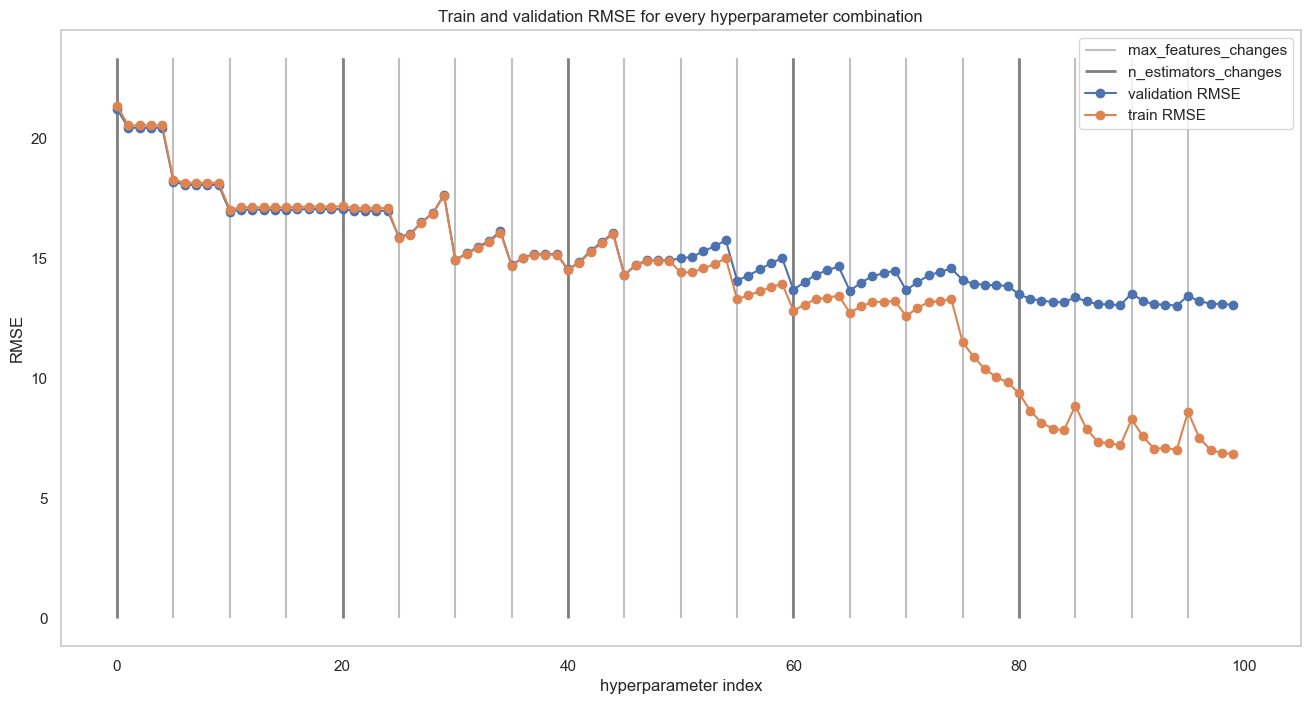

In [70]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.grid(False)


max_features_changes = range(0, params_count, 5)
n_estimators_changes = range(0, params_count, 20)


ax.vlines(
    x=max_features_changes,
    ymin=0,
    ymax=max(val_metric) + 0.1 * max(val_metric),
    label="max_features_changes",
    color="grey",
    alpha=0.5,
)

ax.vlines(
    x=n_estimators_changes,
    ymin=0,
    ymax=max(val_metric) + 0.1 * max(val_metric),
    label="n_estimators_changes",
    color="grey",
    lw=2,
)


ax.plot(val_metric, "o-", label="validation RMSE")
ax.plot(train_metric, "o-", label="train RMSE")
ax.set_xlim(left=-5, right=params_count + 5)

ax.set_title("Train and validation RMSE for every hyperparameter combination")
ax.set_xlabel("hyperparameter index")
ax.set_ylabel("RMSE")

ax.legend()
fig.show()

From the plot above we can easily find hyperparameter combination which have lowest validation RMSE

In [73]:
max_depth = []
max_features = []
n_estimators = []

for param in param_comb:
    max_depth.append(param["max_depth"])
    max_features.append(param["max_features"])
    n_estimators.append(param["n_estimators"])

data = {
    "max_depth": max_depth,
    "max_features": max_features,
    "n_estimators": n_estimators,
    "RMSE": val_metric,
}

df = pd.DataFrame(data)

fig = px.parallel_coordinates(df, color='RMSE', title='Validation RMSE')
fig.show()

For some reason, in jupyter notebook on gitlab it doesn't show the output, so let's just save graph as image and show it below. Because we have fixed randomstate, surely we will have same plot.

![parallel_coordinates_1_rd_45](adaboost/parallel_coords_1_rd_45.png)

![parallel_coordinates_2_rd_45](adaboost/parallel_coords_2_rd_45.png)

![parallel_coordinates_3_rd_45](adaboost/parallel_coords_3_rd_45.png)

From this plot we can not only find best hyperparameters, but also see which hyperparameters how affected our model. For example we can see that for low RMSE bigger values for max_depth play significant role. But for examle n_estimators for low RMSE does not change the results very much, seemingly to be not very significant hyperparameter for our model.

Also we can see very interesting insight - looks like we could try even bigger max_depth hyperparameter, because we still don't see the the decreasy of RMSE due to the very high max_depth.

#### Evaluation

Let's choose the best model and get results on the test data:

In [84]:
best_params = param_comb[np.argmin(val_metric)]
best_params

{'n_estimators': 50, 'max_features': 7, 'max_depth': 16}

In [87]:
best_max_depth = best_params.pop("max_depth")
best_max_features = best_params.pop("max_features")
best_params["estimator"] = DecisionTreeRegressor(
    max_depth=best_max_depth, max_features=best_max_features, random_state=rd_seed
)
best_model = AdaBoostRegressor(**best_params, random_state=rd_seed)

Now we can train our model again on train data (which for 50 estimators and with each max_depth 16 will take quite a bit, or we can just load it very fast from pickle)

In [88]:
best_model.fit(Xtrain, ytrain)

# with open(f"adaboost/best_model_rd_{rd_seed}.pickle", "wb") as file:
    # pickle.dump(best_model, file=file)

In [6]:
with open(f"adaboost/best_model_rd_{rd_seed}.pickle", "rb") as file:
    best_model = pickle.load(file=file)

Low, let's just use classic evaluation with scatter plot - on train, validation and test data to compare final results.

In [126]:
def evaluate(model, X, y_true, title: str):
    fig, ax = plt.subplots()

    y_pred = model.predict(X)

    rmse = metrics.mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)

    ax.plot([0, 100], [0, 100], label="y = x", color="orange", alpha = 0.5)
    sns.scatterplot(x=y_pred, y=y_true, s=1, ax=ax)

    ax.set_xlabel("Predicted value")
    ax.set_ylabel("True value")
    ax.legend()
    ax.set_title(f"{title}\nRMSE = {rmse:.2f}")

    fig.show()

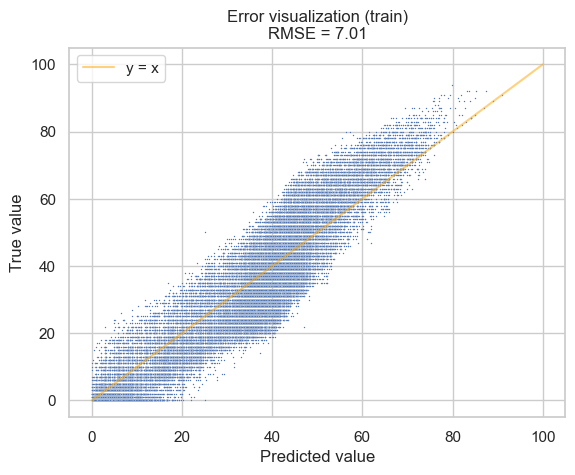

In [127]:
evaluate(model=best_model, X=Xtrain, y_true=ytrain, title="Error visualization (train)")

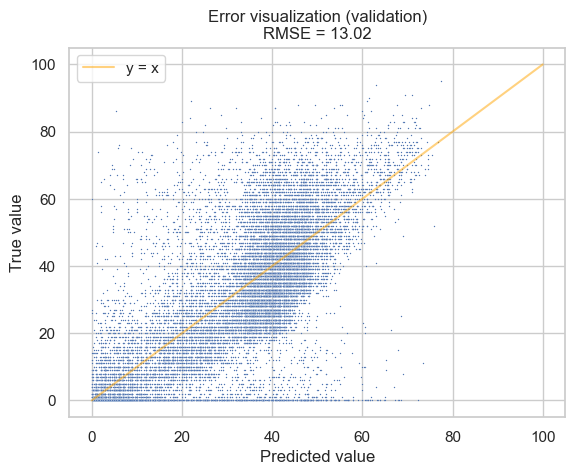

In [128]:
evaluate(model=best_model, X=Xvalid, y_true=yvalid, title="Error visualization (validation)")

🥁🥁🥁

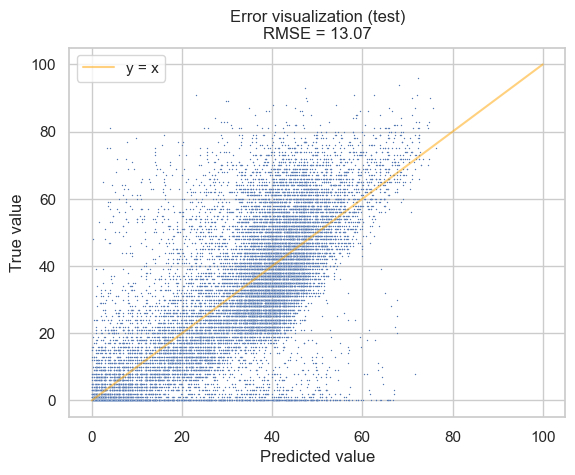

In [129]:
evaluate(model=best_model, X=Xtest, y_true=ytest, title="Error visualization (test)")

We can see the final prediction on the test data - RMSE is 13.07, which is quite a good result, though on the plot we can see some points that are very far away from he line. Though there is not so much of them, but those predictions are very bad. 

What is more interesting - is how very well our model is on train data - RMSE is 7.01. Looks like we have overfitted model.

Now let's deep dive into our model - see how the first tree made decisions and how to last tree made decisions and compare them together. This is interesting because in boosting next tree is trained on weighted dataset - considering the errors of its predecessor.

In [7]:
first_tree = best_model.estimators_[0]
first_tree_weight = best_model.estimator_weights_[0]
print(f"Weight of the first tree: {first_tree_weight}")

Weight of the first tree: 2.439381340082271


In [8]:
last_tree = best_model.estimators_[-1]
last_tree_weight = best_model.estimator_weights_[-1]
print(f"Weight of the first tree: {last_tree_weight}")

Weight of the first tree: 1.3213980097061861


We can see that the weight for the first is higher - because error is higher. Let's look how our weights were changing over time:

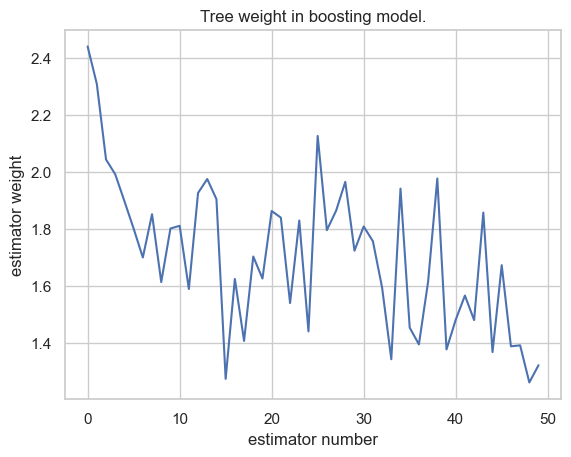

In [156]:
fig, ax = plt.subplots()

sns.lineplot(data=best_model.estimator_weights_, ax=ax)
ax.set_title("Tree weight in boosting model.")
ax.set_xlabel("estimator number")
ax.set_ylabel("estimator weight")

fig.show()

Let's evaluate first tree and the last tree:

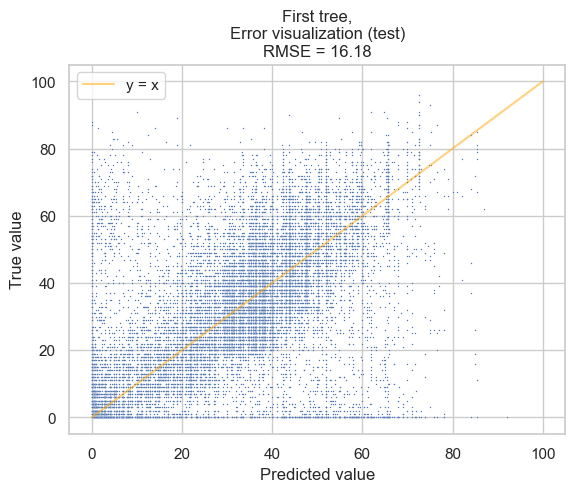

In [150]:
evaluate(first_tree, X=Xtest.values, y_true=ytest, title="First tree,\nError visualization (test)")

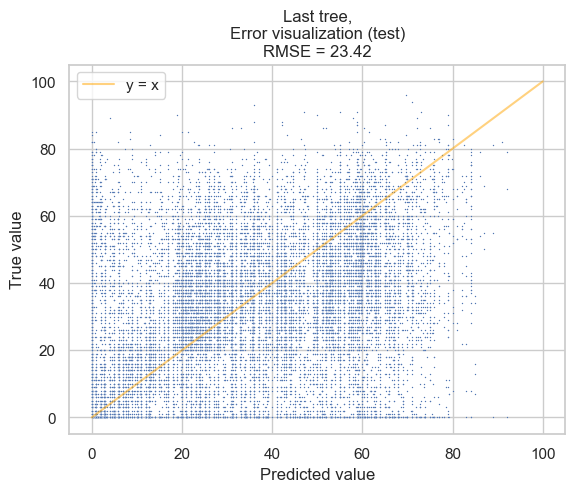

In [151]:
evaluate(last_tree, X=Xtest.values, y_true=ytest, title="Last tree,\nError visualization (test)")

This is very interesting, as we can see the last model is very bad at generalization. Let's see how they are well on training data:

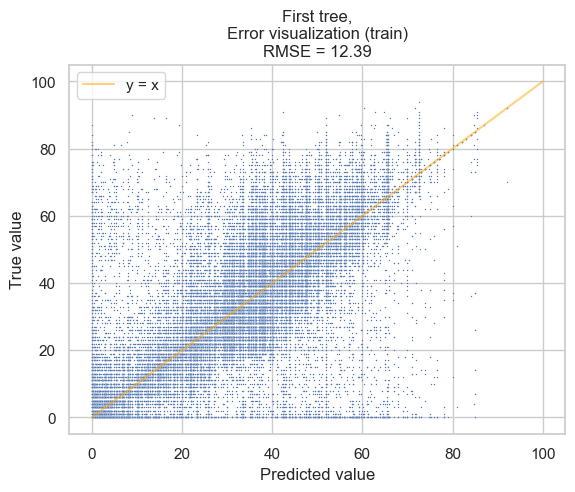

In [152]:
evaluate(first_tree, X=Xtrain.values, y_true=ytrain, title="First tree,\nError visualization (train)")

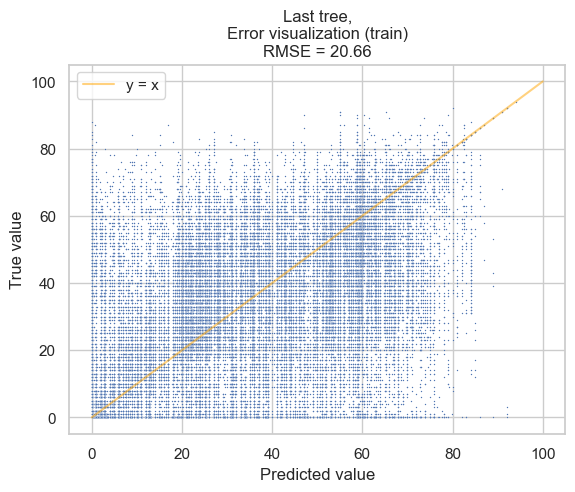

In [153]:
evaluate(last_tree, X=Xtrain.values, y_true=ytrain, title="Last tree,\nError visualization (train)")

Now, this is very interesting. RMSE for the last tree even on training data is much worse. Though due to the boosting the last model is trained on the errors of its predecessors, still has quite predictions.

Now let's visualize how RMSE changes for each estimator:

In [155]:
train_rmse = []
val_rmse = []
test_rmse = []

for estimator in best_model.estimators_:
    train_rmse.append(
        metrics.mean_squared_error(
            y_true=ytrain, y_pred=estimator.predict(Xtrain.values), squared=False
        )
    )
    val_rmse.append(
        metrics.mean_squared_error(
            y_true=yvalid, y_pred=estimator.predict(Xvalid.values), squared=False
        )
    )
    test_rmse.append(
        metrics.mean_squared_error(
            y_true=ytest, y_pred=estimator.predict(Xtest.values), squared=False
        )
    )


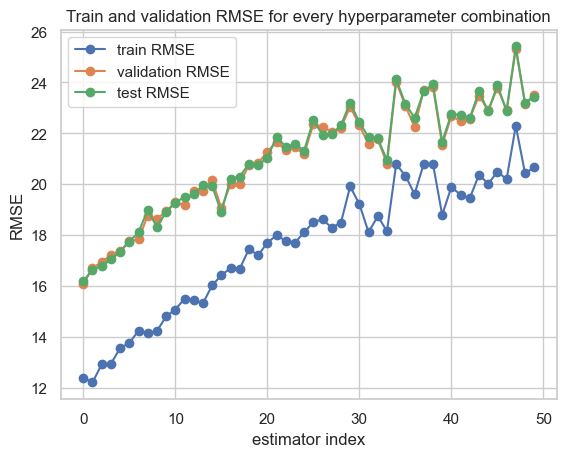

In [157]:
fig, ax = plt.subplots()

ax.plot(train_rmse, "o-", label="train RMSE")
ax.plot(val_rmse, "o-", label="validation RMSE")
ax.plot(test_rmse, "o-", label="test RMSE")


ax.set_title("RMSE for each estimator in AdaBoost")
ax.set_xlabel("estimator index")
ax.set_ylabel("RMSE")

ax.legend()


fig.show()

This is how our RMSE changed for each next model, meaning each next model was worse at its prediction. Though of course we should always consider weights for each estimator.

As final visualizataion, let's see how exactly first tree and last tree split data:

Because our trees has depth 16, this means it will have $2^{16} - 1 = 65535$ nodes, so we will show only first 4 levels:

In [167]:
viz = dtreeviz.model(
    model=first_tree,
    X_train=Xtrain,
    y_train=ytrain,
    feature_names=Xtrain.columns,
    target_name='popularity'
)

view = viz.view(depth_range_to_display=(0,3))

In [ ]:
view.save(f"adaboost/best_model_first_tree_rd_{rd_seed}.svg")

SVG image is too big for visualization in the jupyter notebook and may cause lags, so let's convert it into png first. We will use cairosvg package for this purpose. Even conversion lasts for a very long time.

In [5]:
cairosvg.svg2png(url=f"adaboost/best_model_first_tree_rd_{rd_seed}.svg", write_to=f"adaboost/best_model_first_tree_rd_{rd_seed}.png", dpi=300)

<!-- SVG is too large to be displayed because of lots of points, be carefull! -->
<!-- ![first_tree](adaboost/best_model_first_tree_rd_45.svg) -->
![first_tree](adaboost/best_model_first_tree_rd_45.png)

And the last tree:

In [18]:
viz = dtreeviz.model(
    model=last_tree,
    X_train=Xtrain,
    y_train=ytrain,
    feature_names=Xtrain.columns,
    target_name='popularity'
)

view = viz.view(depth_range_to_display=(0,3))

In [19]:
view.save(f"adaboost/best_model_last_tree_rd_{rd_seed}.svg")
cairosvg.svg2png(url=f"adaboost/best_model_last_tree_rd_{rd_seed}.svg", write_to=f"adaboost/best_model_last_tree_rd_{rd_seed}.png", dpi=300)

<!-- SVG is too large to be displayed because of lots of points, be carefull! -->
<!-- ![first_tree](adaboost/best_model_last_tree_rd_45.svg) -->
![last_tree](adaboost/best_model_last_tree_rd_45.png)

### References

- [1] Kaggle, Júlio Guedes, spotify-popularity-prediction-v2, https://www.kaggle.com/competitions/spotify-popularity-prediction-v2
- [2] Scikit-learn, scikit-learn developers (BSD License), sklearn.linear_model.Ridge, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- [3] AdaBoost.R2, Improving Regressors using Boosting Techniques, [Drucker (1997)](https://pdfs.semanticscholar.org/8d49/e2dedb817f2c3330e74b63c5fc86d2399ce3.pdf)
- [4] Scikit-learn, scikit-learn developers (BSD License), sklearn.ensemble.AdaBoostRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html, sklearn.tree.DecisionTreeRegressor https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html